# **Á§æÁæ§Â™íÈ´îÂàÜÊûê_Êúü‰∏≠Â∞àÊ°à**

* **ÁµÑÂì°ÔºöM094810008 ÈªÉÂ≠êÊ∫ê„ÄÅM094030040 Â≠´‰∫¶Ëæ≤„ÄÅM104020058 ÈªÉÂºòÁëã„ÄÅM094111006 ÂëÇÂ•ïÊÜ≤**

* **ÂàÜÊûê‰∏ªÈ°åÔºöÁΩ∑ÂÖçÈô≥ÊüèÊÉü‰∫ã‰ª∂‰πãÁ§æÁæ§Ë®éË´ñ_‰ª•PTTËàáDCARDÁÇ∫‰æã**

* **Ë≥áÊñô‰æÜÊ∫êÔºöPTT - ‰∏≠Â±±ÊñáÂ≠óÂàÜÊûêÂπ≥Âè∞  , DCARD - DCARD_APIÁà¨Ëü≤**

* **Ë≥áÊñôÊúüÈñìÔºö2021/03/05 ~ 2021/10/31**

## **1.ËºâÂÖ•Â•ó‰ª∂**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.dates as mdate
import re
import jieba
import jieba.analyse
from datetime import datetime
from wordcloud import WordCloud 
import math
from nltk import ngrams
from collections import defaultdict
from nltk import FreqDist
from collections import Counter, namedtuple
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from numpy.linalg import norm
from snownlp import SnowNLP
import seaborn as sns

## **2.Ë≥áÊñôÂâçËôïÁêÜ**

## ËºâÂÖ•Ë≥áÊñô

In [468]:
MetaData_gossip = pd.read_csv('Data/bowei_gossip_articleMetaData.csv')
Reviews_gossip = pd.read_csv('Data/bowei_gossipÔºí_articleReviews.csv')
MetaData_hatepolitic=pd.read_csv('Data/bowei_HatePolitics_articleMetaData.csv')
Reviews_hatepolitic = pd.read_csv('Data/bowei_HatePolitics_articleReviews.csv')
Dcard_content_data = pd.read_csv("Data/dcard_content_data.csv",encoding = "utf-8-sig")
Dcard_reply_data = pd.read_csv('Data/dcard_reply_data.csv',encoding = "utf-8-sig")

## ÁØ©ÈÅ∏Ë≥áÊñôÊúüÈñì

In [469]:
Dcard_content_data['date'] = pd.to_datetime(Dcard_content_data['createdAt']).dt.year*10000 + pd.to_datetime(Dcard_content_data['createdAt']).dt.month*100+pd.to_datetime(Dcard_content_data['createdAt']).dt.day
mask1 = Dcard_content_data['date']>=20210305
mask2 = Dcard_content_data['date']<20211101
Dcard_content_data = Dcard_content_data[mask1&mask2]

In [470]:
Dcard_reply_data['date'] = pd.to_datetime(Dcard_reply_data['createdAt']).dt.year*10000 + pd.to_datetime(Dcard_reply_data['createdAt']).dt.month*100+pd.to_datetime(Dcard_reply_data['createdAt']).dt.day
mask1 = Dcard_reply_data['date']>=20210305
mask2 = Dcard_reply_data['date']<20211101
Dcard_reply_data = Dcard_reply_data[mask1&mask2]

## ÂÜçÊ¨°ÁØ©ÈÅ∏Ê®ôÈ°åÂÖ∑ÊúâÈóúÈçµÂ≠ó‰πãÊñáÁ´†

ÈóúÈçµÂ≠óÔºö['ÁΩ∑ÂÖç','‰ºØÊÉü','ÊüèÊÉü','ÊüèÁ∂≠','Âà™Q','Âü∫ÈÄ≤','ÈÅ∏ÁΩ∑Ê≥ï','Â†±Âæ©ÊÄß','ÂØ¨ÊÅÜ','È°èÂÆ∂','ÊÉ°ÁΩ∑','ÊÉ°ÊÑèÁΩ∑ÂÖç','‰∏âQ','3Q']

In [471]:
keywords = ['ÁΩ∑ÂÖç','‰ºØÊÉü','ÊüèÊÉü','ÊüèÁ∂≠','Âà™Q','Âü∫ÈÄ≤','ÈÅ∏ÁΩ∑Ê≥ï','Â†±Âæ©ÊÄß','ÂØ¨ÊÅÜ','È°èÂÆ∂','ÊÉ°ÁΩ∑','ÊÉ°ÊÑèÁΩ∑ÂÖç','‰∏âQ','3Q']
toMatch = '|'.join(keywords)

In [472]:
MetaData_gossip = MetaData_gossip.loc[MetaData_gossip['artTitle'].str.contains(toMatch), :]
MetaData_gossip.reset_index(inplace=True, drop=True) 
MetaData_hatepolitic = MetaData_hatepolitic.loc[MetaData_hatepolitic['artTitle'].str.contains(toMatch), :]
MetaData_hatepolitic.reset_index(inplace=True, drop=True) 
Dcard_content_data.loc[Dcard_content_data['title'].str.contains(toMatch), :]
print("PTTÂÖ´Âç¶ÁâàÁ∏ΩÂÖ±Êúâ ",MetaData_gossip.shape[0],"ÁØáË≤ºÊñá""\nPTTÊîøÈªëÊùøÁ∏ΩÂÖ±Êúâ",MetaData_hatepolitic.shape[0],"ÁØáË≤ºÊñá","\nDcardÊôÇ‰∫ãÁâàÁ∏ΩÂÖ±Êúâ",Dcard_content_data.shape[0],"ÁØáË≤ºÊñá")

PTTÂÖ´Âç¶ÁâàÁ∏ΩÂÖ±Êúâ  3461 ÁØáË≤ºÊñá
PTTÊîøÈªëÊùøÁ∏ΩÂÖ±Êúâ 2935 ÁØáË≤ºÊñá 
DcardÊôÇ‰∫ãÁâàÁ∏ΩÂÖ±Êúâ 385 ÁØáË≤ºÊñá


In [473]:
Reviews_gossip = MetaData_gossip.iloc[:,0:-1].merge(Reviews_gossip.loc[:,["artUrl",'cmtPoster',"cmtContent"]], how = "left", on = 'artUrl')
Reviews_hatepolitic = MetaData_hatepolitic.iloc[:,0:-1].merge(Reviews_hatepolitic.loc[:,["artUrl",'cmtPoster',"cmtContent"]], how = "left", on = 'artUrl')
print("PTTÂÖ´Âç¶ÁâàÁ∏ΩÂÖ±Êúâ ",Reviews_gossip.shape[0],"ÂâáÁïôË®Ä" ,"\nPTTÊîøÈªëÁâàÁ∏ΩÂÖ±Êúâ",Reviews_hatepolitic.shape[0],"ÂâáÁïôË®Ä","\nDcardÊôÇ‰∫ãÁâàÁ∏ΩÂÖ±Êúâ",Dcard_reply_data.shape[0],"ÂâáÁïôË®Ä")

PTTÂÖ´Âç¶ÁâàÁ∏ΩÂÖ±Êúâ  282193 ÂâáÁïôË®Ä 
PTTÊîøÈªëÁâàÁ∏ΩÂÖ±Êúâ 97559 ÂâáÁïôË®Ä 
DcardÊôÇ‰∫ãÁâàÁ∏ΩÂÖ±Êúâ 6431 ÂâáÁïôË®Ä


## Âêà‰ΩµË≥áÊñô

In [474]:
MetaData = pd.concat([MetaData_gossip,MetaData_hatepolitic],axis=0).reset_index() 
Reviews= pd.concat([Reviews_gossip,Reviews_hatepolitic],axis=0).reset_index() 

In [475]:
Reviews.dropna(subset = ["cmtContent"], inplace=True)
Dcard_reply_data.dropna(subset = ["content"], inplace=True)
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('(ÂÆåÊï¥ÂÖßÂÆπ|Êñ∞ËÅû|Êñ∞ËÅûÁ∂≤ÂùÄ|Êñ∞ËÅû‰æÜÊ∫ê|Â™íÈ´î‰æÜÊ∫ê|Ë®òËÄÖÁΩ≤Âêç|Á∂≤ÂùÄ‰æÜÊ∫ê|ÂÆåÊï¥Êñ∞ËÅûÊ®ôÈ°å|ÂÆåÊï¥Êñ∞ËÅûÂÖßÊñá|ÂÆåÊï¥Êñ∞ËÅûÈÄ£Áµê|(ÊàñÁü≠Á∂≤ÂùÄ)|ÂÇôË®ª:|ÂÇôË®ªË´ãÊîæÊúÄÂæåÈù¢|ÈÅïËÄÖÊñ∞ËÅûÊñáÁ´†Âà™Èô§)', '', str(x)))
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('(http|https)://.*', '', str(x)))
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '',str(x)))
Reviews['cmtContent'] = Reviews.cmtContent.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', str(x)))
Dcard_content_data['content'] = Dcard_content_data.content.apply(lambda x: re.sub('(http|https)://.*', '', str(x)))
Dcard_content_data['content'] = Dcard_content_data.content.apply(lambda x:re.sub('[^\u4e00-\u9fa5]+', '', str(x)))
Dcard_reply_data['content'] = Dcard_reply_data.content.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', str(x)))
Dcard_reply_data.rename(columns={"postId": "id"},inplace=True)

## **3.ÈÄèÈÅéN-gramÂπ´Âä©Âª∫Á´ãÂ≠óÂÖ∏**

## Ë®≠ÂÆöÁµêÂ∑¥Êñ∑Ë©ûÁ≥ªÁµ±

In [476]:
#Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./dict/dict.txt.big')

#Êñ∞Â¢ûstop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

## bigram

In [477]:
# Ë®≠ÂÆö bigram Êñ∑Ë©û function
def bigram_getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    seg_list = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list)]
    return seg_list

In [478]:
bowei_bigram_Meta = MetaData.copy()
bowei_bigram_Meta["word"] = bowei_bigram_Meta.sentence.apply(bigram_getToken)
bowei_bigram_Meta = bowei_bigram_Meta.explode('word')
bowei_bigram_Meta_count = bowei_bigram_Meta.groupby(["word"],as_index=False).size()
wb_filter = list(bowei_bigram_Meta_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
bowei_bigram_Meta_count[wb_filter].sort_values(by=['size'], ascending=False).head(10)

Building prefix dict from C:\Users\Roger\Desktop\Á†îÁ©∂ÊâÄ\Á¢©‰∫å‰∏ä\Á§æÁæ§Â™íÈ´îÂàÜÊûê\Êúü‰∏≠Â∞àÊ°à\dict\dict.txt.big ...
Loading model from cache C:\Users\Roger\AppData\Local\Temp\jieba.ub71048b8c07f5daab26a6e4a18fdb850.cache
Loading model cost 1.159 seconds.
Prefix dict has been built successfully.


word  size
56421   Âè∞ÁÅ£ Âü∫ÈÄ≤  1158
150126  ÊüèÊÉü ÁΩ∑ÂÖç  1056
194890  Á´ãÂßî ÊüèÊÉü   695
207895  ÁΩ∑ÂÖç ÊäïÁ•®   540
74399   Âü∫ÈÄ≤ Á´ãÂßî   450
59903   ÂêåÊÑè ÁΩ∑ÂÖç   438
214094  ËÇá‰∫ã ÈÄÉÈÄ∏   420
207818  ÁΩ∑ÂÖç ÊàêÂäü   420
208257  ÁΩ∑ÂÖç ÊüèÊÉü   375
209531  ÁΩ∑ÂÖç ÈñÄÊ™ª   373

In [480]:
bowei_bigram_Reviews = Reviews.copy()
bowei_bigram_Reviews["word"] = bowei_bigram_Reviews.cmtContent.apply(bigram_getToken)
bowei_bigram_Reviews = bowei_bigram_Reviews.explode('word')
bowei_bigram_Reviews.head(3)
bowei_bigram_Reviews_count = bowei_bigram_Reviews.groupby(["word"],as_index=False).size()
wb_filter = list(bowei_bigram_Reviews_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
bowei_bigram_Reviews_count[wb_filter].sort_values(by=['size'], ascending=False).head(10)

word  size
26068    ‰∏≠ÂÖ± ÂêåË∑Ø‰∫∫  1319
402802    ËÇá‰∫ã ÈÄÉÈÄ∏  1038
109402    Âè∞ÁÅ£ ÂÉπÂÄº   764
390970    ÁΩ∑ÂÖç ÊàêÂäü   652
241349    ÊîØÊåÅ ÁΩ∑ÂÖç   429
246587    ÊîøÊ≤ª ‰∫∫Áâ©   402
110342    Âè∞ÁÅ£ Ê∞ë‰∏ª   374
120889  ÂìàÂìàÂìà ÂìàÂìàÂìà   373
454495    Ë≥≠Âçö ÈõªÁé©   372
88063     ÂãáÊñº ÊâøÊìî   335

In [481]:
bowei_bigram_dcard_content = Dcard_content_data.copy()
bowei_bigram_dcard_content["word"] = bowei_bigram_dcard_content.content.apply(bigram_getToken)
bowei_bigram_dcard_content = bowei_bigram_dcard_content.explode('word')
bowei_bigram_dcard_content_count = bowei_bigram_dcard_content.groupby(["word"],as_index=False).size()
wb_filter = list(bowei_bigram_dcard_content_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
bowei_bigram_dcard_content_count[wb_filter].sort_values(by=['size'], ascending=False).head(10)

word  size
4780    Âè∞ÁÅ£ Âü∫ÈÄ≤    79
12902   ÊüèÊÉü ÁΩ∑ÂÖç    76
18873   ËÇá‰∫ã ÈÄÉÈÄ∏    71
18274   ÁΩ∑ÂÖç ÊüèÊÉü    43
16952   Á´ãÂßî ÊüèÊÉü    43
18228   ÁΩ∑ÂÖç ÊäïÁ•®    42
6381    Âü∫ÈÄ≤ Á´ãÂßî    35
5125    ÂêåÊÑè ÁΩ∑ÂÖç    30
11194   ÊîøÊ≤ª ‰∫∫Áâ©    29
6815   Â§ßÈ∫ª ÂêàÊ≥ïÂåñ    26

In [482]:
bowei_bigram_dcard_reply = Dcard_reply_data.copy()
bowei_bigram_dcard_reply["word"] = bowei_bigram_dcard_reply.content.apply(bigram_getToken)
bowei_bigram_dcard_reply = bowei_bigram_dcard_reply.explode('word')
bowei_bigram_dcard_reply_count = bowei_bigram_dcard_reply.groupby(["word"],as_index=False).size()
wb_filter = list(bowei_bigram_dcard_reply_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
bowei_bigram_dcard_reply_count[wb_filter].sort_values(by=['size'], ascending=False).head(10)

word  size
28197   ËÇá‰∫ã ÈÄÉÈÄ∏    94
16384   ÊîØÊåÅ ÊüèÊÉü    94
27332   ÁΩ∑ÂÖç ÊüèÊÉü    69
19124   ÊüèÊÉü ÊîØÊåÅ    61
1736    ‰∏≠Âúã Áñ´Ëãó    61
16428   ÊîØÊåÅ ÁΩ∑ÂÖç    57
27448   ÁΩ∑ÂÖç Á∏ΩÁµ±    45
1568   ‰∏≠ÂÖ± ÂêåË∑Ø‰∫∫    41
27268   ÁΩ∑ÂÖç ÊàêÂäü    41
10139  Â†±Âæ©ÊÄß ÁΩ∑ÂÖç    34

Âæû‰∏äÈù¢ bigram ÁµêÊûú‰∏≠ÔºåÊàëÂÄëÁôºÁèæ"Âè∞ÁÅ£ ÂÉπÂÄº","‰∏≠ÂÖ± ÂêåË∑Ø‰∫∫","ËÇá‰∫ã ÈÄÉÈÄ∏"Á≠âË©ûÂèØ‰ª•ÁµÑÂêàÂú®‰∏ÄËµ∑ÔºåÊâÄ‰ª•ÊàëÂÄëÂ¢ûÂä†Ëá™ÂÆöÁæ©Â≠óÂÖ∏‰æÜÂπ´Âä©Êñ∑Ë©ûËÉΩÊõ¥Ê∫ñÁ¢∫„ÄÇ
ÊàëÂÄëÂ∞áË©ûÂΩôÊï¥ÁêÜÂ≠òÂú® dict Êñá‰ª∂Â§æ‰∏≠ÁöÑ bowei_dict.txt ‰∏≠„ÄÇ

## **4.Êñ∑Ë©û**

In [483]:
#Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./dict/dict.txt.big')
#Êñ∞Â¢ûËá™ÂÆöÁæ©Â≠óÂÖ∏
jieba.load_userdict('./dict/bowei_dict.txt')
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]
w=['È´òÈõÑ','‰∏çÁî®','Áï∂Âàù','ÂòªÂòª','ÂèçÊ≠£','‰∏ÄÂ†Ü','Âè™ËÉΩ','ÊòéÊòé','ÊúâÊ≤íÊúâ','Âè™ÊúÉ','Êï¥Â§©','‰∏ÄÈªû','ÂππÂòõ','ÈÄôÊòØ','Êúâ‰∫∫','Âú∞Êñπ','ÈÇÑÂú®','Âè∞‰∏≠','ÊäïÁ•®','ÈÅ∏Ê∞ë']
for i in w:
    stopWords.append(i)

Building prefix dict from C:\Users\Roger\Desktop\Á†îÁ©∂ÊâÄ\Á¢©‰∫å‰∏ä\Á§æÁæ§Â™íÈ´îÂàÜÊûê\Êúü‰∏≠Â∞àÊ°à\dict\dict.txt.big ...
Loading model from cache C:\Users\Roger\AppData\Local\Temp\jieba.ub71048b8c07f5daab26a6e4a18fdb850.cache
Loading model cost 1.207 seconds.
Prefix dict has been built successfully.


In [484]:
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] 
    return seg_list

In [485]:
MetaData['word'] = MetaData.sentence.apply(getToken)
MetaData_token = MetaData.explode('word')

In [486]:
Reviews['word'] = Reviews.cmtContent.apply(getToken)
Reviews_token = Reviews.explode('word') 

In [487]:
Dcard_content_data['word'] = Dcard_content_data.content.apply(getToken)
Dcard_content_token = Dcard_content_data.explode('word')

In [488]:
Dcard_reply_data['word'] = Dcard_reply_data.content.apply(getToken)
Dcard_reply_token = Dcard_reply_data.explode('word')

In [489]:
Ptt_data = pd.concat([MetaData_token.loc[:,["artDate","artUrl",'artCat',"word"]],Reviews_token.loc[:,["artDate","artUrl",'artCat',"word"]]],axis=0)
Ptt_data['artDate'] = pd.to_datetime(Ptt_data['artDate'], format="%Y/%m/%d")

In [490]:
Dcard_data = pd.concat([Dcard_content_token.loc[:,["date","id","word"]],Dcard_reply_token.loc[:,["date","id","word"]]],axis=0)
Dcard_data['date'] = pd.to_datetime(Dcard_data['date'],format='%Y%m%d')

## ÊñáÁ´†Êï∏ËàáÊñáÂ≠óÈõ≤

Text(0, 0.5, 'count')

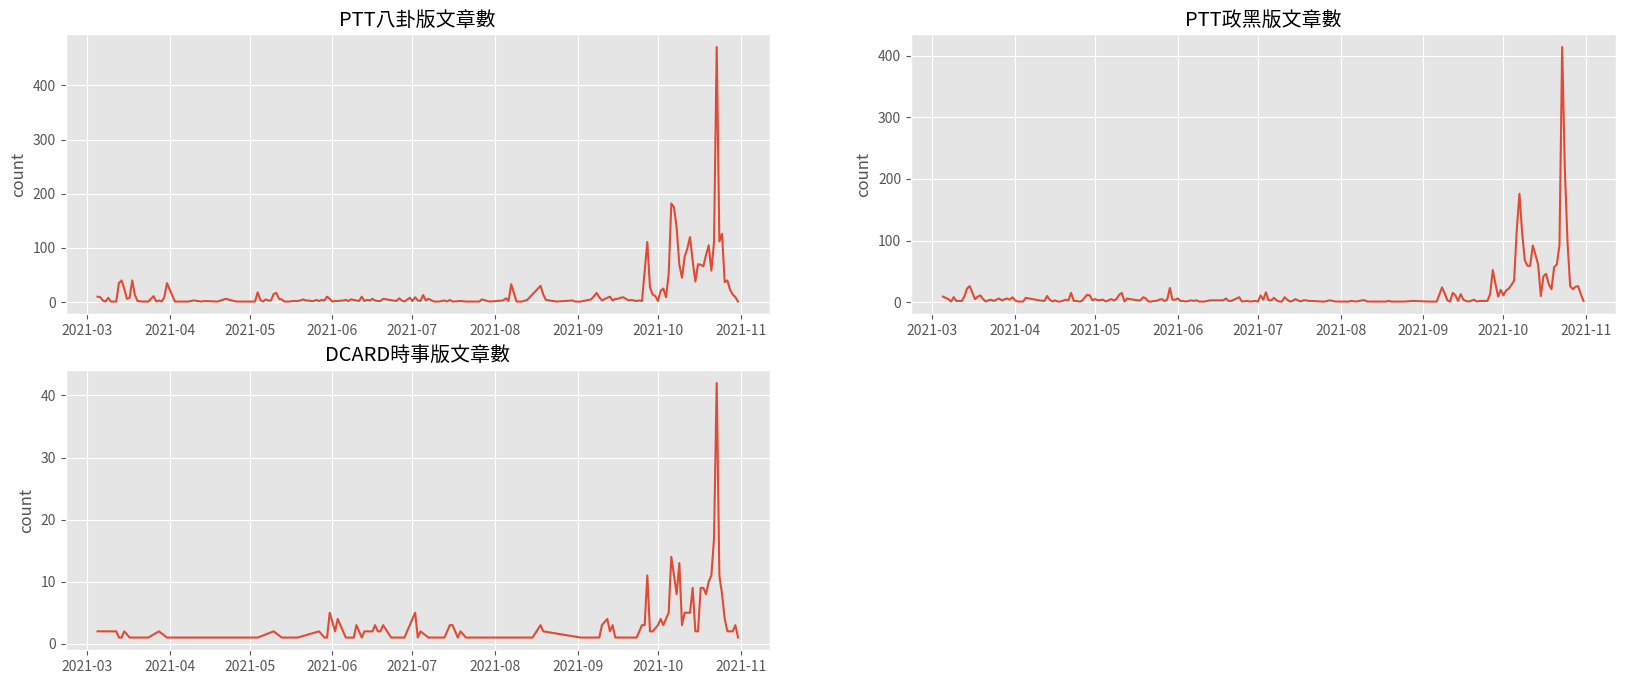

In [491]:
MetaData_gossip['artDate'] = pd.to_datetime(MetaData_gossip['artDate'],format='%Y/%m/%d')
MetaData_hatepolitic['artDate'] = pd.to_datetime(MetaData_hatepolitic['artDate'],format='%Y/%m/%d')
PTT_gossip_datecount = pd.DataFrame(MetaData_gossip.groupby('artDate').size(),columns = ['count'])
PTT_hatepolitic_datecount = pd.DataFrame(MetaData_hatepolitic.groupby('artDate').size(),columns = ['count'])


plt.figure(figsize=(20,8))   # È°ØÁ§∫ÂúñÊ°ÜÊû∂Â§ßÂ∞è (ÂØ¨,È´ò)
plt.style.use("ggplot")     # ‰ΩøÁî®ggplot‰∏ªÈ°åÊ®£Âºè
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #‰Ωø‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus']=False #Áî®‰æÜÊ≠£Â∏∏È°ØÁ§∫Ë≤†Ëôü

a = plt.subplot(221)
plt.plot(PTT_gossip_datecount.index,PTT_gossip_datecount['count'].tolist())
plt.title('PTTÂÖ´Âç¶ÁâàÊñáÁ´†Êï∏')
plt.ylabel('count')
b = plt.subplot(222)
plt.plot(PTT_hatepolitic_datecount.index,PTT_hatepolitic_datecount['count'].tolist())
plt.title('PTTÊîøÈªëÁâàÊñáÁ´†Êï∏')
plt.ylabel('count')
c = plt.subplot(223)
plt.plot(Dcard_datecount.index,Dcard_datecount['count'].tolist())
plt.title('DCARDÊôÇ‰∫ãÁâàÊñáÁ´†Êï∏')
plt.ylabel('count')

In [492]:
#Ë®àÁÆóË©ûÈ†ª
Ptt_word_count = Ptt_data.groupby(['artCat','word'],as_index=False).size()
Ptt_word_count.sort_values(by=['size'], ascending=False,inplace=True) 
Ptt_word_count = Ptt_word_count[Ptt_word_count['size']>3]
Ptt_word_count = pd.DataFrame(Ptt_word_count)
Ptt_word_count.head(5)

artCat word   size
65296      Gossiping   ÁΩ∑ÂÖç  17866
138175  HatePolitics   ÁΩ∑ÂÖç  12214
22285      Gossiping  Â°îÁ∂†Áè≠  11420
59581      Gossiping   ÁúüÁöÑ  10146
61428      Gossiping   Á´ãÂßî   8862

In [131]:
Dcard_word_count = Dcard_data.groupby(['word'],as_index=False).size()
Dcard_word_count.sort_values(by=['size'], ascending=False,inplace=True) 
Dcard_word_count = Dcard_word_count[Dcard_word_count['size']>3]
Dcard_word_count["artCat"]="Dcard"
Dcard_word_count = pd.DataFrame(Dcard_word_count)
Dcard_word_count.head(5)

word  size artCat
13060   ÁΩ∑ÂÖç  2070  Dcard
17044  Èô≥ÊüèÊÉü  1394  Dcard
12333   Á´ãÂßî   827  Dcard
10076  Ê∞ëÈÄ≤Èª®   787  Dcard
8250    ÊîØÊåÅ   677  Dcard

In [493]:
word_count = pd.concat([Ptt_word_count,Dcard_word_count])

In [494]:
def Wc_dict(df, cat, countB, countS):
    wc_df = (df.query('artCat == @cat') # ÁØ©ÈÅ∏Êó•Êúü
             .query('size < @countB')# ÁØ©ÈÅ∏ÊúÄÂ§ßÊï∏Èáè
             .query('size > @countS')# ÁØ©ÈÅ∏ÊúÄÂ∞èÊï∏Èáè
             .sort_values('size', ascending=False))
    wc_dict = dict(zip(wc_df['word'], wc_df['size'])) #Âª∫Á´ãÊàêdictionary
    
    return wc_dict

### ÂÖ´Âç¶ÁâàÊñáÂ≠óÈõ≤

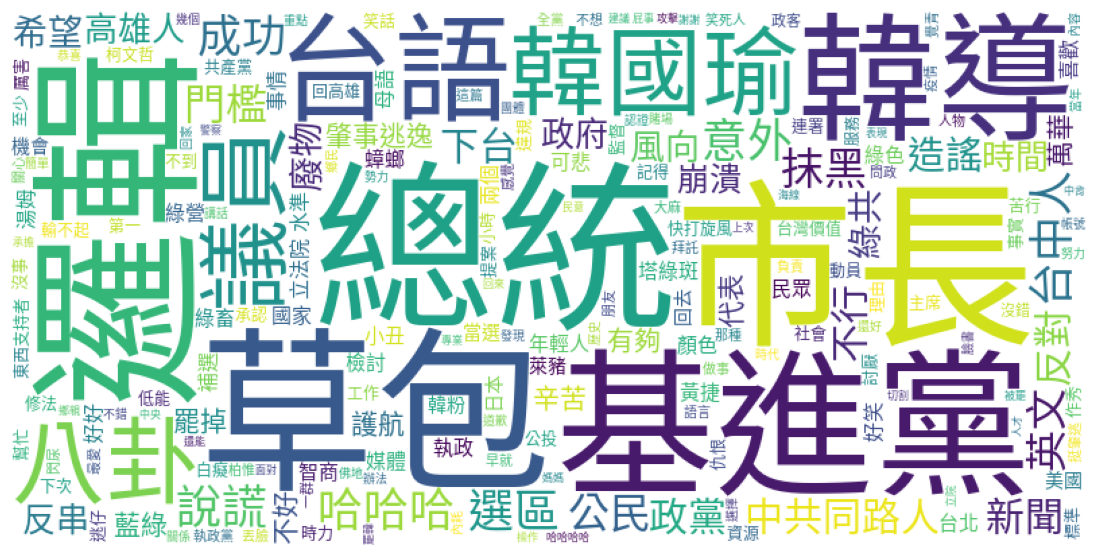

In [496]:
dict_gossip = Wc_dict(word_count,'Gossiping',2000,50)

font = './SourceHanSansTW-Regular.otf' #‰∏≠ÊñáÂ≠óÂûãË∑ØÂæë
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_gossip)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #Êää‰ΩúÂúñÁöÑÂ∫ßÊ®ôËª∏ÈóúÊéâ 
plt.show()

### ÊîøÈªëÁâàÊñáÂ≠óÈõ≤

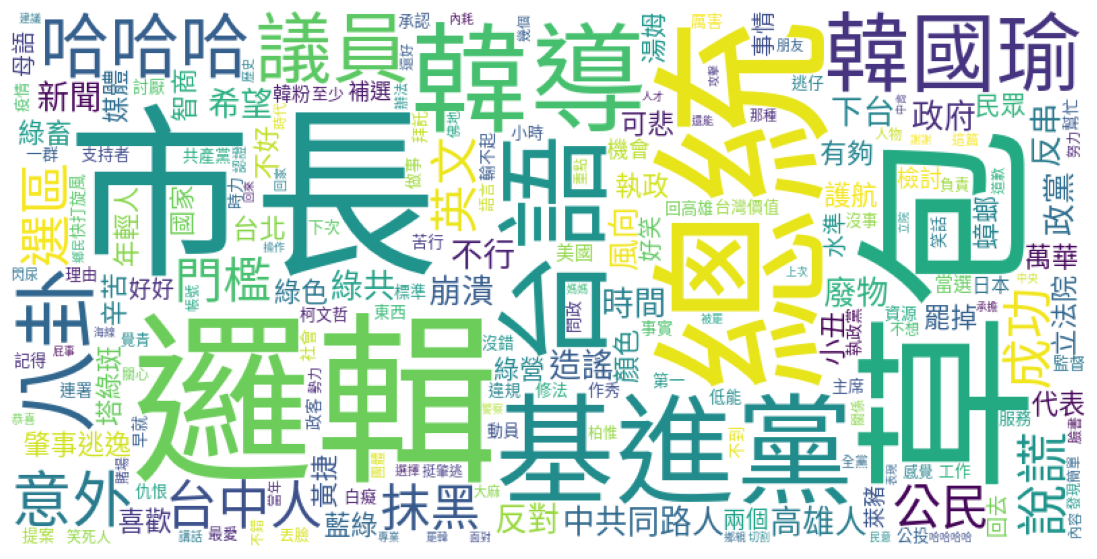

In [498]:
dict_hatepolitics = Wc_dict(word_count,'HatePolitics',2000,50)

font = './SourceHanSansTW-Regular.otf' #‰∏≠ÊñáÂ≠óÂûãË∑ØÂæë
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_gossip)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #Êää‰ΩúÂúñÁöÑÂ∫ßÊ®ôËª∏ÈóúÊéâ 
plt.show()

# DCARD ÊñáÁ´†ËàáÁïôË®ÄÊñáÂ≠óÈõ≤

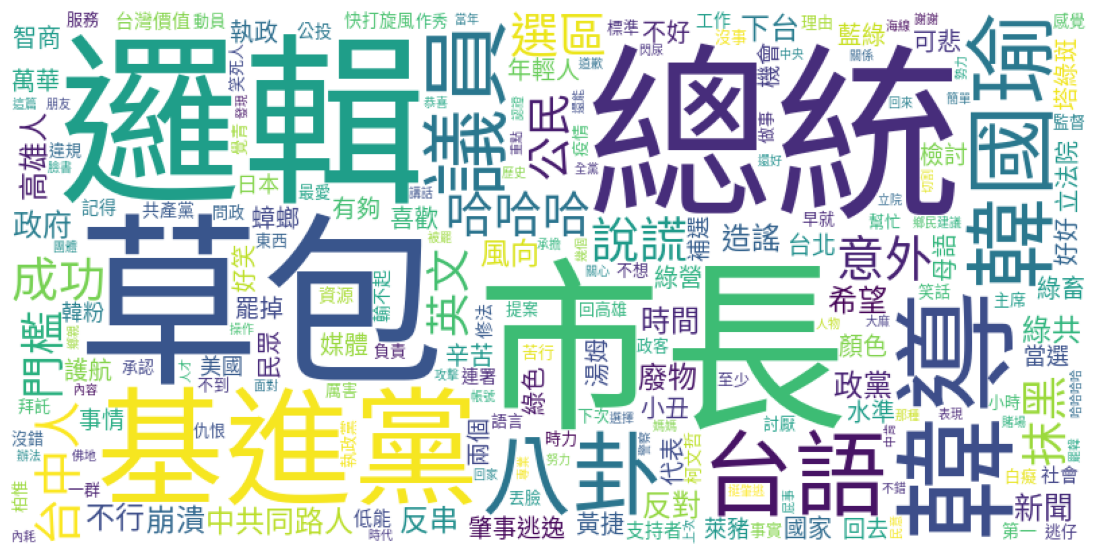

In [499]:
dict_dcard = Wc_dict(word_count,'Dcard',1000,50)

font = './SourceHanSansTW-Regular.otf' #‰∏≠ÊñáÂ≠óÂûãË∑ØÂæë
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_gossip)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #Êää‰ΩúÂúñÁöÑÂ∫ßÊ®ôËª∏ÈóúÊéâ 
plt.show()

## **5.Ë≠∞È°åË®éË´ñ**

* PTT 
1. Ë≠∞È°åÊÉÖÁ∑íÂàÜÊûê
2. ÊâæÂá∫Á∂≤ËªçÁöÑÂ≠òÂú®
* Dcard
1. Ë≠∞È°åÊÉÖÁ∑íÂàÜÊûê
2. ÊâæÂá∫Á∂≤ËªçÁöÑÂ≠òÂú®

## PTT

In [500]:
#Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./dict/dict.txt.big')
#Êñ∞Â¢ûËá™ÂÆöÁæ©Â≠óÂÖ∏
jieba.load_userdict('./dict/bowei_dict.txt')
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]
w=['È´òÈõÑ','‰∏çÁî®','Áï∂Âàù','ÂòªÂòª','ÂèçÊ≠£','‰∏ÄÂ†Ü','Âè™ËÉΩ','ÊòéÊòé','ÊúâÊ≤íÊúâ','Âè™ÊúÉ','Êï¥Â§©','‰∏ÄÈªû','ÂππÂòõ','ÈÄôÊòØ','Êúâ‰∫∫','Âú∞Êñπ','ÈÇÑÂú®','Âè∞‰∏≠','ÊäïÁ•®','ÈÅ∏Ê∞ë']
for i in w:
    stopWords.append(i)

Building prefix dict from C:\Users\Roger\Desktop\Á†îÁ©∂ÊâÄ\Á¢©‰∫å‰∏ä\Á§æÁæ§Â™íÈ´îÂàÜÊûê\Êúü‰∏≠Â∞àÊ°à\dict\dict.txt.big ...
Loading model from cache C:\Users\Roger\AppData\Local\Temp\jieba.ub71048b8c07f5daab26a6e4a18fdb850.cache
Loading model cost 1.105 seconds.
Prefix dict has been built successfully.


In [501]:
bigramfdist = FreqDist()
def bigram_getToken_dict(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    bigramfdist.update(ngrams(seg_list, 2))
    seg_list2 = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list2)]
    return seg_list

In [197]:
bowei_bigram_ptt = MetaData.copy()
bowei_bigram_ptt["word"] = bowei_bigram_ptt.sentence.apply(bigram_getToken_dict)
bowei_bigram_ptt_token = bowei_bigram_ptt.explode('word')

In [198]:
d = {k:v for k,v in bigramfdist.most_common(50)}
# Create network plot 
G = nx.Graph()

# Âª∫Á´ã nodes ÈñìÁöÑÈÄ£Áµê
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v)
    
# ÂèñÂæóedgeÊ¨äÈáç
weights = [w[2]['weight']*0.03 for w in  G.edges(data=True)]

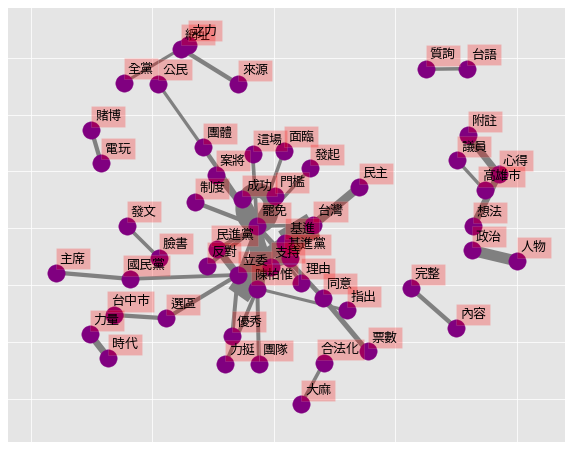

In [199]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Â¢ûÂä† labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

ÂæûÂÖ±Á∑öÂúñÂèØ‰ª•ÁôºÁèæÊúâÂπæÂÄã‰∏ªË¶ÅË®éË´ñÁöÑË≠∞È°åÔºåÂàÜÂà•ÊòØÂ§ßÈ∫ªÂêàÊ≥ïÂåñ„ÄÅË≥™Ë©¢„ÄÅË≥≠ÂçöÈõªÁé©Á≠âÁ≠â
‰∏ãÈù¢ÂàÜÊûêÂ∞áÂæûÈÄôË£°ÁôºÁèæÁöÑË≠∞È°åÂèäÊñ∞ËÅû‰∏äÂ∏∏ÊèêÂà∞ÁöÑË≠∞È°åÈÄ≤Ë°åÂàÜÊûê„ÄÇ

### Ê†πÊìöË≠∞È°å‰ΩøÁî®liwcÊÉÖÁ∑íÂàÜÊûê

### Case1 Ë≥™Ë©¢&Âá∫Â∏≠

In [514]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"./dict/liwc/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])
df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)
df_liwc

word sentiments
0     ‰∏ÄÁÑ°ÊâÄÊúâ   negative
1     ‰∏ÉÁ´ÖÁîüÁÖô   negative
2       ‰∏äÁï∂   negative
3       ‰∏ãÊµÅ   negative
4       ‰∏ãÁ≠â   negative
...    ...        ...
1706    È≠ÖÂäõ   positive
1707    ÈÆÆÊòé   positive
1708    ÈÆÆÁæé   positive
1709    ÈºìÂãµ   positive
1710    ÈºìËàû   positive

[1711 rows x 2 columns]

In [515]:
keywords1 = ['Ë≥™Ë©¢','Âá∫Â∏≠Áéá']
toMatch = '|'.join(keywords1)
MetaData_issue1=MetaData_token.loc[MetaData['artTitle'].str.contains(toMatch),:]
MetaData_issue1.reset_index(inplace=True, drop=True) 
Reviews_issue1 = MetaData_issue1.iloc[:,0:-1].merge(Reviews_token.loc[:,["artUrl","cmtContent",'word']], how = "left", on = 'artUrl')
data_issue1 = pd.concat([MetaData_issue1.loc[:,["artCat",'artDate',"artUrl","word"]],Reviews_issue1.loc[:,["artCat",'artDate',"artUrl","word"]]],axis=0)

In [516]:
issue1_liwc = pd.merge(data_issue1, df_liwc, on=['word'],how='left')
sentiment_issue1 = issue1_liwc.groupby(['artCat','artDate','sentiments'],as_index=False).size()

<Figure size 1200x800 with 0 Axes>

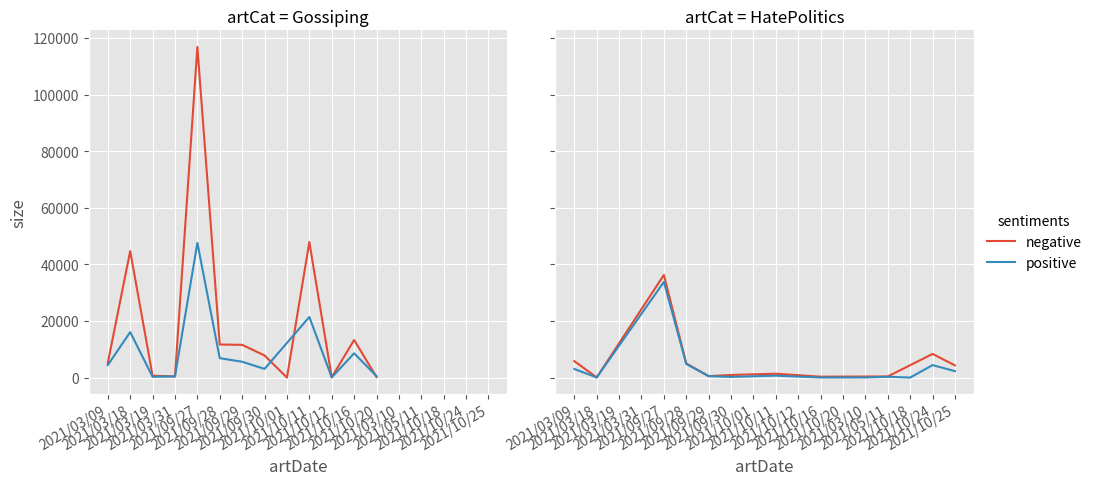

In [517]:
plt.figure(figsize = (12,8))
ax=sns.relplot(x="artDate",y='size',data=sentiment_issue1,hue='sentiments',ci=None,col='artCat',kind='line')
ax.fig.autofmt_xdate() 

ÂèØ‰ª•ÁôºÁèæÂú®Ë≥™Ë©¢ËàáÂá∫Â∏≠ÁéáÈÄôÂÄãË≠∞È°å‰∏äÊîøÈªëÊùøÁöÑÊ≠£Ë≤†Èù¢ÊÉÖÁ∑íÊòØÂ∑Æ‰∏çÂ§öÁöÑ‰ΩÜÊòØÂú®ÂÖ´Âç¶ÁâàÂ∞±ÊúâÊòéÈ°ØÁöÑÂú®È´òÂ≥∞ÊúüË≤†Èù¢ÊÉÖÁ∑íÊØîËºÉÂ§öÁöÑÊÉÖÊ≥Å

### Case2 ËÇá‰∫ãÈÄÉÈÄ∏

In [520]:
keywords2 = ['ËÇáÈÄÉ','ËÇá‰∫ãÈÄÉÈÄ∏']
toMatch = '|'.join(keywords2)
MetaData_issue2=MetaData_token.loc[MetaData['artTitle'].str.contains(toMatch),:]
MetaData_issue2.reset_index(inplace=True, drop=True) 
Reviews_issue2 = MetaData_issue2.iloc[:,0:-1].merge(Reviews_token.loc[:,["artUrl","cmtContent",'word']], how = "left", on = 'artUrl')
data_issue2 = pd.concat([MetaData_issue2.loc[:,["artCat",'artDate',"artUrl","word"]],Reviews_issue2.loc[:,["artCat",'artDate',"artUrl","word"]]],axis=0)

In [519]:
issue2_liwc = pd.merge(data_issue2, df_liwc, on=['word'],how='left')
sentiment_issue2 = issue2_liwc.groupby(['artCat','artDate','sentiments'],as_index=False).size()

<Figure size 1200x800 with 0 Axes>

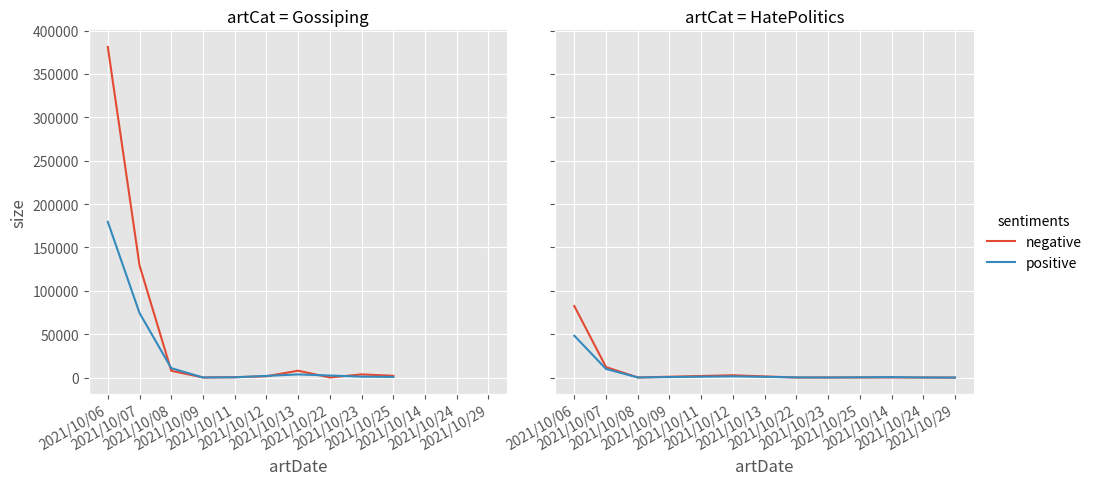

In [521]:
plt.figure(figsize = (12,8))
ax=sns.relplot(x="artDate",y='size',data=sentiment_issue2,hue='sentiments',ci=None,col='artCat',kind='line')
ax.fig.autofmt_xdate() 

Âú®ËÇá‰∫ãÈÄÉÈÄ∏ÈÄôÂÄãË≠∞È°å‰∏äÈ°ØÁÑ∂Â§ßÂÆ∂Ê≤íÊúâÂ§™Â§öÁöÑËààË∂£ÔºåÂú®Ë≠∞È°åÂâõÁàÜÁôºÁöÑÁ¨¨‰∏ÄÂ§©Ë≤†Èù¢ÊÉÖÁ∑íÂæàÈ´òÂæå‰æÜÂ∞±Ê≤íÊúâË®éË´ñÁöÑËÅ≤Èáè‰∫Ü„ÄÇ

### Case3 Ë≥≠Âçö

In [528]:
keywords3 = ['Ë≥≠Âçö','ÈõªÂãï','Âø´ÊâìÊóãÈ¢®']
toMatch = '|'.join(keywords3)
MetaData_issue3=MetaData_token.loc[MetaData['artTitle'].str.contains(toMatch),:]
MetaData_issue3.reset_index(inplace=True, drop=True) 
Reviews_issue3 = MetaData_issue3.iloc[:,0:-1].merge(Reviews_token.loc[:,["artUrl","cmtContent",'word']], how = "left", on = 'artUrl')
data_issue3 = pd.concat([MetaData_issue3.loc[:,["artCat",'artDate',"artUrl","word"]],Reviews_issue3.loc[:,["artCat",'artDate',"artUrl","word"]]],axis=0)

In [529]:
issue3_liwc = pd.merge(data_issue3, df_liwc, on=['word'],how='left')
sentiment_issue3 = issue3_liwc.groupby(['artCat','artDate','sentiments'],as_index=False).size()

<Figure size 1200x800 with 0 Axes>

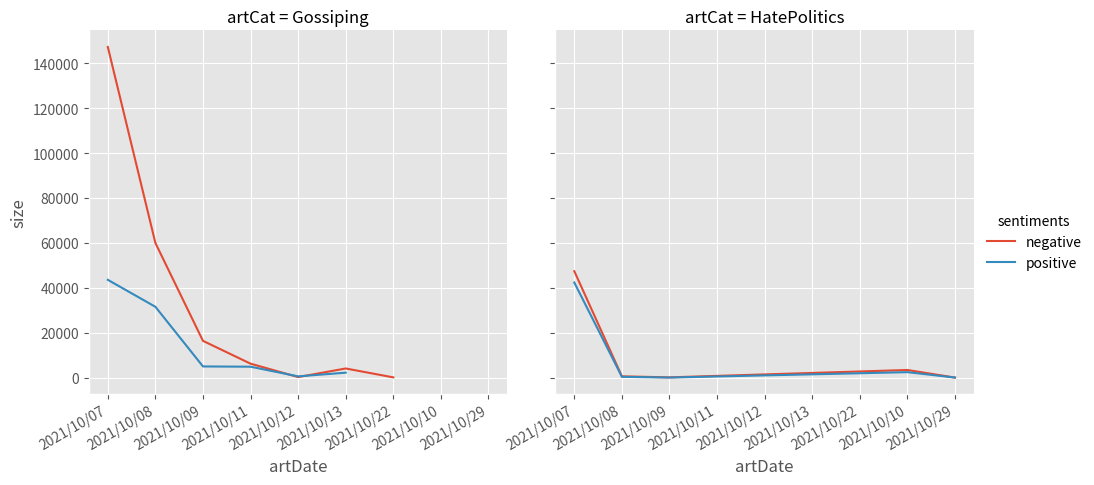

In [530]:
plt.figure(figsize = (12,8))
ax=sns.relplot(x="artDate",y='size',data=sentiment_issue3,hue='sentiments',ci=None,col='artCat',kind='line')
ax.fig.autofmt_xdate() 

Ë≥≠ÂçöÈÄôÂÄãË≠∞È°åÁöÑÊÉÖÊ≥ÅËàáËÇá‰∫ãÈÄÉÈÄ∏ÊÉÖÊ≥ÅÁõ∏‰ººÈÉΩÊòØÂú®ÂâõÂá∫‰æÜÊôÇË≤†Èù¢ÊÉÖÁ∑íËºÉÈ´òËÄåÂæåÈù¢Â∞±Ê≤íÊúâË®éË´ñËÅ≤Èáè„ÄÇ

ÂèØ‰ª•Ê≥®ÊÑèÁöÑÊòØÂú®ÊîøÈªëÊùøÂ∞çÊñºË≥≠ÂçöËàáÈõªÁé©ÈÄôÂÄãË≠∞È°åÁöÑÊ≠£Ë≤†Èù¢ÊÉÖÁ∑íÂ∑ÆË∑ù‰∏¶Ê≤íÊúâÂà∞ÂæàÂ§ß„ÄÇ

### Case4 ÊÉ°ÊÑèÁΩ∑ÂÖç

In [531]:
keywords4 = ['ÊÉ°ÊÑèÁΩ∑ÂÖç','Â†±Âæ©ÊÄß']
toMatch = '|'.join(keywords4)
MetaData_issue4=MetaData_token.loc[MetaData['artTitle'].str.contains(toMatch),:]
MetaData_issue4.reset_index(inplace=True, drop=True) 
Reviews_issue4 = MetaData_issue4.iloc[:,0:-1].merge(Reviews_token.loc[:,["artUrl","cmtContent",'word']], how = "left", on = 'artUrl')
data_issue4 = pd.concat([MetaData_issue4.loc[:,["artCat",'artDate',"artUrl","word"]],Reviews_issue4.loc[:,["artCat",'artDate',"artUrl","word"]]],axis=0)

In [532]:
issue4_liwc = pd.merge(data_issue4, df_liwc, on=['word'],how='left')
sentiment_issue4 = issue4_liwc.groupby(['artCat','artDate','sentiments'],as_index=False).size()

<Figure size 1200x800 with 0 Axes>

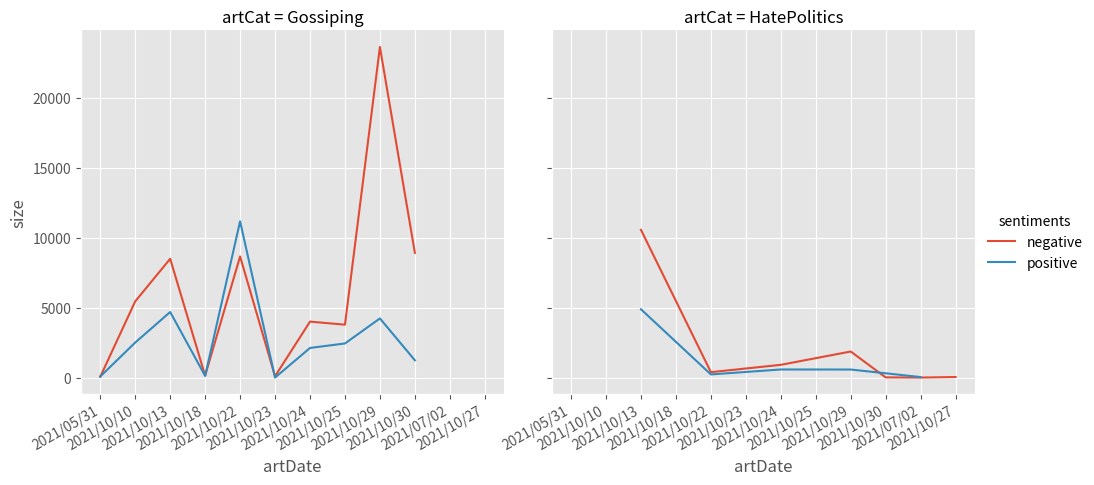

In [533]:
plt.figure(figsize = (12,8))
ax=sns.relplot(x="artDate",y='size',data=sentiment_issue4,hue='sentiments',ci=None,col='artCat',kind='line')
ax.fig.autofmt_xdate() 

ÊÉ°ÊÑèÁΩ∑ÂÖçÁöÑÈÄôÂÄãË≠∞È°åÁúãËµ∑‰æÜÂú®ÂÖ´Âç¶ÁâàÊØîËºÉÊúâË®éË´ñÁÜ±Â∫¶Ôºå‰∏¶‰∏îÂèØ‰ª•ÁúãÂà∞Âú®ÁΩ∑ÂÖçÂâçÊ≠£Èù¢ÊÉÖÁ∑íÈÇÑÊòØÊØîËºÉÂ§ßÁöÑÔºåËÄåÂú®ÁΩ∑ÂÖçÁï∂ÈÄ±Ë≤†Èù¢ÊÉÖÁ∑íÂ§ßÂπÖË∂ÖËªä„ÄÇ

### Case5 ‰∏≠ÂúãÊìç‰Ωú:Â∞çË©±È°åÊìç‰ΩúÂé≠ÊÉ°

In [534]:
keywords5 = ['‰∏≠Âúã','‰∏≠ÂÖ±']
toMatch = '|'.join(keywords5)
MetaData_issue5=MetaData_token.loc[MetaData['artTitle'].str.contains(toMatch),:]
MetaData_issue5.reset_index(inplace=True, drop=True) 
Reviews_issue5 = MetaData_issue5.iloc[:,0:-1].merge(Reviews_token.loc[:,["artUrl","cmtContent",'word']], how = "left", on = 'artUrl')
data_issue5 = pd.concat([MetaData_issue5.loc[:,["artCat",'artDate',"artUrl","word"]],Reviews_issue5.loc[:,["artCat",'artDate',"artUrl","word"]]],axis=0)

artCat     artDate                                             artUrl  \
0  Gossiping  2021/03/14  https://www.ptt.cc/bbs/Gossiping/M.1615695401....   
1  Gossiping  2021/03/14  https://www.ptt.cc/bbs/Gossiping/M.1615695401....   
2  Gossiping  2021/03/14  https://www.ptt.cc/bbs/Gossiping/M.1615695401....   
3  Gossiping  2021/03/14  https://www.ptt.cc/bbs/Gossiping/M.1615695401....   
4  Gossiping  2021/03/14  https://www.ptt.cc/bbs/Gossiping/M.1615695401....   

  word  
0  Èô≥ÊüèÊÉü  
1   ÂæóÁΩ™  
2   ‰∏≠ÂÖ±  
3   Ê¨∫Ë≤†  
4   Âè∞ÁÅ£

In [535]:
issue5_liwc = pd.merge(data_issue5, df_liwc, on=['word'],how='left')
sentiment_issue5 = issue5_liwc.groupby(['artCat','artDate','sentiments'],as_index=False).size()

<Figure size 1200x800 with 0 Axes>

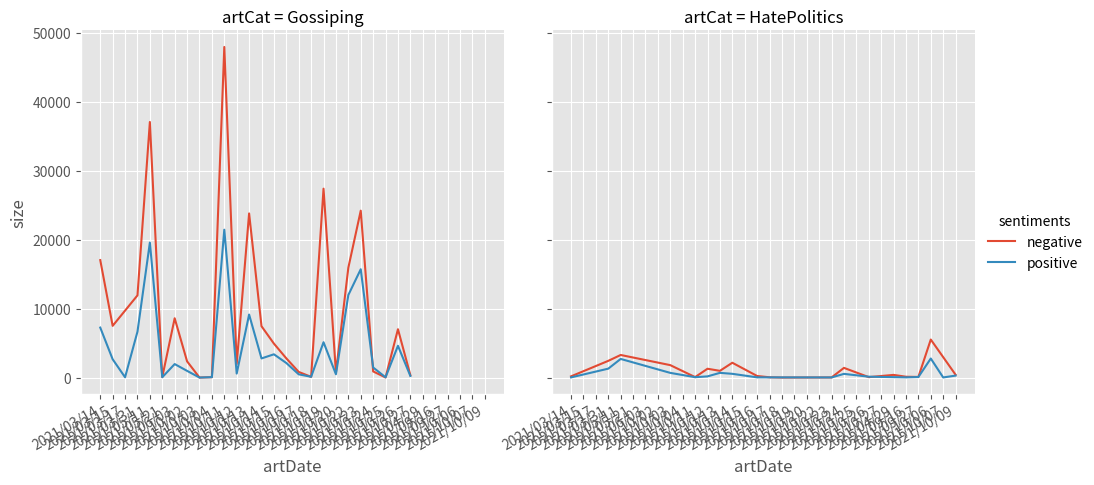

In [536]:
plt.figure(figsize = (12,8))
ax=sns.relplot(x="artDate",y='size',data=sentiment_issue5,hue='sentiments',ci=None,col='artCat',kind='line')
ax.fig.autofmt_xdate() 

Âú®‰∏≠ÂúãÈÄôÂÄãË≠∞È°å‰∏äÂÖ´Âç¶Áâà‰∏ÄÁõ¥Â≠òÂú®ËëóË®éË´ñÁÜ±Â∫¶‰ΩÜË≤†Èù¢ÊÉÖÁ∑í‰∏ÄÁõ¥ÊòØÂãùÈÅéÊ≠£Èù¢ÊÉÖÁ∑íÔºåÁ¥∞ÁúãÁïôË®ÄÁôºÁèæÂ§ßÂÆ∂Â∞çÊñºÈÄôÂÄãË≠∞È°åÊìç‰ΩúÊÑüÂà∞Âé≠ÂÄ¶„ÄÇ

ËÄåÂú®ÊîøÈªëÁâàÂèØ‰ª•ÁúãÂà∞Âú®ÁΩ∑ÂÖçÂâçÂπæÈÄ±Êúâ‰∏ÄÊ≥¢ÊØîËºÉÂ§ßÁöÑË®éË´ñËÅ≤ÈáèÂêåÊ®£‰πüÊòØË≤†Èù¢ÊÉÖÁ∑íÂ§ßÊñºÊ≠£Èù¢ÊÉÖÁ∑í„ÄÇ

### Case6 Â§ßÈ∫ªÂêàÊ≥ïÂåñ

In [537]:
keywords6 = ['Â§ßÈ∫ª','Â§ßÈ∫ªÂêàÊ≥ï']
toMatch = '|'.join(keywords6)
MetaData_issue6=MetaData_token.loc[MetaData['artTitle'].str.contains(toMatch),:]
MetaData_issue6.reset_index(inplace=True, drop=True) 
Reviews_issue6 = MetaData_issue6.iloc[:,0:-1].merge(Reviews_token.loc[:,["artUrl","cmtContent",'word']], how = "left", on = 'artUrl')
data_issue6 = pd.concat([MetaData_issue6.loc[:,["artCat",'artDate',"artUrl","word"]],Reviews_issue6.loc[:,["artCat",'artDate',"artUrl","word"]]],axis=0)

In [538]:
issue6_liwc = pd.merge(data_issue6, df_liwc, on=['word'],how='left')
sentiment_issue6 = issue6_liwc.groupby(['artCat','artDate','sentiments'],as_index=False).size()

<Figure size 1200x800 with 0 Axes>

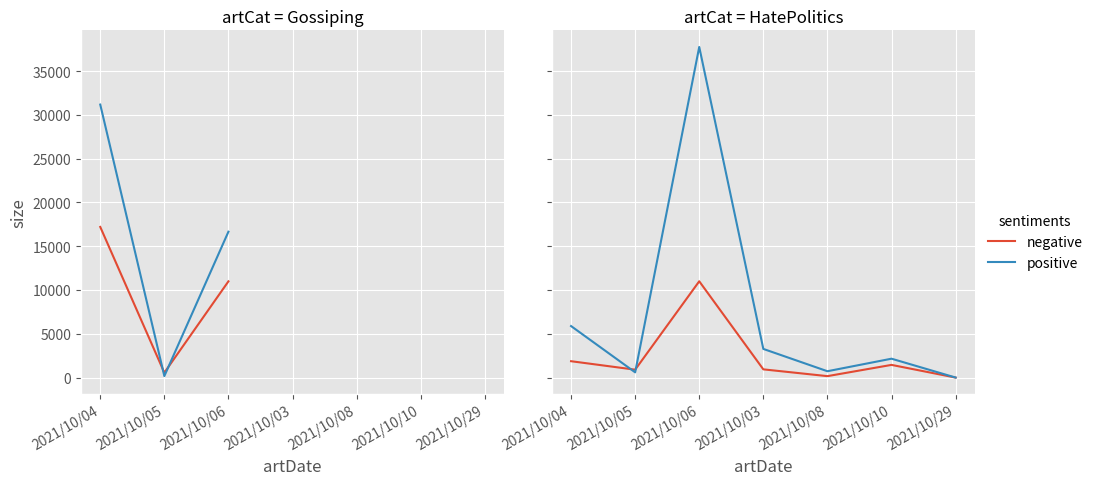

In [539]:
plt.figure(figsize = (12,8))
ax=sns.relplot(x="artDate",y='size',data=sentiment_issue6,hue='sentiments',ci=None,col='artCat',kind='line')
ax.fig.autofmt_xdate() 

Â§ßÈ∫ªÂêàÊ≥ïÂåñÈÄôÂÄãË≠∞È°åÁõ∏ËºÉÂâçÂπæÂÄãË≠∞È°å‰∏çÂêåÁöÑÊòØÂÖ´Âç¶Ë∑üÊîøÈªëÁöÑÊ≠£Èù¢ÊÉÖÁ∑íÈÉΩÊØîË≤†Èù¢ÊÉÖÁ∑íÈ´òÔºåÈ°ØÁÑ∂Â§ßÂÆ∂Â∞çÊñºÈöéÊÆµÊÄßÈñãÊîæÂ§ßÈ∫ªÊåÅËºÉÊ≠£Èù¢ÁöÑÊÖãÂ∫¶„ÄÇ

ÂêÑË≠∞È°åËÅ≤ÈáèÊØîËºÉ

In [540]:
a1=issue1_liwc.groupby(['artCat','sentiments'],as_index=False).size()
a1['issue']='Ë≥™Ë©¢'
a2=issue1_liwc.groupby(['artCat','sentiments'],as_index=False).size()
a2['issue']='ËÇáÈÄÉ'
a3=issue3_liwc.groupby(['artCat','sentiments'],as_index=False).size()
a3['issue']='Ë≥≠Âçö'
a4=issue4_liwc.groupby(['artCat','sentiments'],as_index=False).size()
a4['issue']='ÊÉ°ÊÑèÁΩ∑ÂÖç'
a5=issue5_liwc.groupby(['artCat','sentiments'],as_index=False).size()
a5['issue']='‰∏≠ÂÖ±'
a6=issue6_liwc.groupby(['artCat','sentiments'],as_index=False).size()
a6['issue']='Â§ßÈ∫ªÂêàÊ≥ïÂåñ'
data_issue=pd.concat([a1,a2,a3,a4,a5,a6],axis=0)

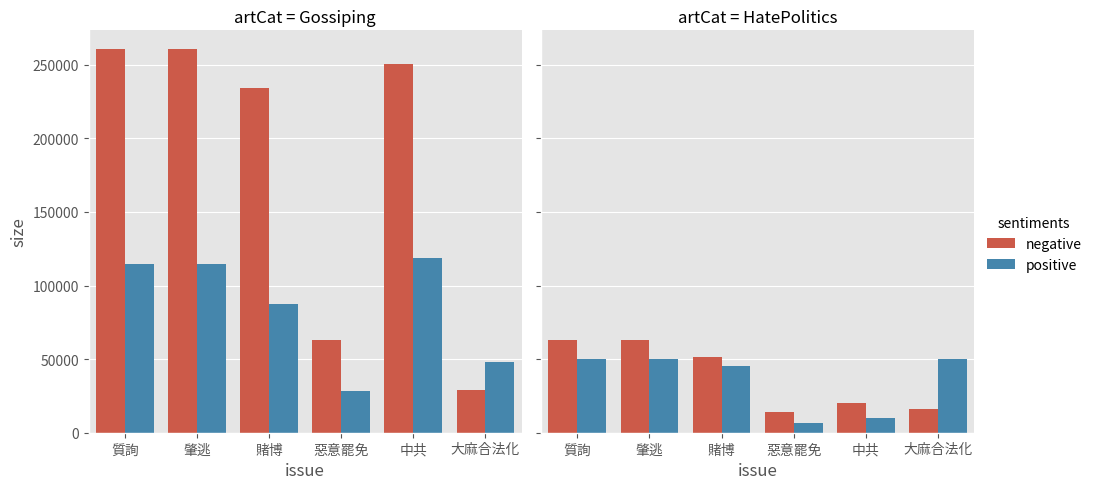

In [541]:
sns.catplot(x='issue',y='size',data=data_issue,hue='sentiments',ci=None,col='artCat',kind='bar')

ÂæûË®éË´ñËÅ≤Èáè‰æÜÁúãÂÖ´Âç¶ÁâàÁöÑË®éË´ñÁÜ±Â∫¶ÊúÉÂ§ßÊñºÊîøÈªëÊùøÔºåÂú®ÂêÑË≠∞È°å‰æÜÁúãÂü∫Êú¨‰∏äÈÉΩÊòØË≤†Èù¢ÊÉÖÁ∑íÂ§ßÊñºÊ≠£Èù¢ÊÉÖÁ∑íÔºàÈô§‰∫ÜÂ§ßÈ∫ªÂêàÊ≥ïÂåñÔºâÔºåËÄåÂêÑË≠∞È°åÂú®ÂÖ´Âç¶ÁâàÁöÑË≤†Èù¢ÊÉÖÁ∑íÁîöËá≥ÊòØÊ≠£Èù¢ÊÉÖÁ∑íÁöÑÂÖ©ÂÄç‰ª•‰∏ä„ÄÇ

### ÊäìÂá∫ÁâπÂÆöÁôºÊñáËÄÖËàáÊé®ÊñáËÄÖÁî®snownlpÂÅöÊÉÖÁ∑íÂàÜÊûê

In [542]:
Reviews_poster=pd.concat([Reviews_gossip,Reviews_hatepolitic],axis=0).reset_index() 
Reviews_poster.head(5)

index                    artTitle     artDate   artTime  \
0      0  Re:[Êñ∞ËÅû]„ÄêÂà™QÂç±Ê©ü„ÄëÁ∂†ÁáüÂÖßÈÉ®Ê∞ëË™øÊè≠Èô≥ÊüèÊÉü‰ªáÊÅ®ÂÄº  2021/03/05  06:23:04   
1      1  Re:[Êñ∞ËÅû]„ÄêÂà™QÂç±Ê©ü„ÄëÁ∂†ÁáüÂÖßÈÉ®Ê∞ëË™øÊè≠Èô≥ÊüèÊÉü‰ªáÊÅ®ÂÄº  2021/03/05  06:23:04   
2      2  Re:[Êñ∞ËÅû]„ÄêÂà™QÂç±Ê©ü„ÄëÁ∂†ÁáüÂÖßÈÉ®Ê∞ëË™øÊè≠Èô≥ÊüèÊÉü‰ªáÊÅ®ÂÄº  2021/03/05  06:23:04   
3      3  Re:[Êñ∞ËÅû]„ÄêÂà™QÂç±Ê©ü„ÄëÁ∂†ÁáüÂÖßÈÉ®Ê∞ëË™øÊè≠Èô≥ÊüèÊÉü‰ªáÊÅ®ÂÄº  2021/03/05  06:23:04   
4      4  Re:[Êñ∞ËÅû]„ÄêÂà™QÂç±Ê©ü„ÄëÁ∂†ÁáüÂÖßÈÉ®Ê∞ëË™øÊè≠Èô≥ÊüèÊÉü‰ªáÊÅ®ÂÄº  2021/03/05  06:23:04   

                                              artUrl artPoster     artCat  \
0  https://www.ptt.cc/bbs/Gossiping/M.1614925386....   XXXXGAY  Gossiping   
1  https://www.ptt.cc/bbs/Gossiping/M.1614925386....   XXXXGAY  Gossiping   
2  https://www.ptt.cc/bbs/Gossiping/M.1614925386....   XXXXGAY  Gossiping   
3  https://www.ptt.cc/bbs/Gossiping/M.1614925386....   XXXXGAY  Gossiping   
4  https://www.ptt.cc/bbs/Gossiping/M.1614925386....   XXXXGAY  Gossiping   

   commentNum  push  boo    cmtPoster  cmtContent  
0           5     4    0    r13974682         :ÊªæÂãï  
1           5     4    0    userpeter           :  
2           5     4    0        RRADA  :ÊòØÁ∂≤Ë∑ØÁ¥Ö‰∫∫Êï∏‰ΩçËë£Âçì  
3           5     4    0          BIA       :Á¨ëÊ≠ª3f  
4           5     4    0  koreawargod         :XD

È†ªÁπÅÂõûÊñáËÄÖ

In [544]:
poster_review_count=Reviews_poster.groupby(['cmtPoster'],as_index=False).size()
poster_review_count.sort_values('size', ascending = False).head(5)

cmtPoster  size
16506     kterry01  1292
4801   WTF55665566  1123
2946       MVPGGYY  1062
9229     coffee112  1045
7572     bighorse0   866

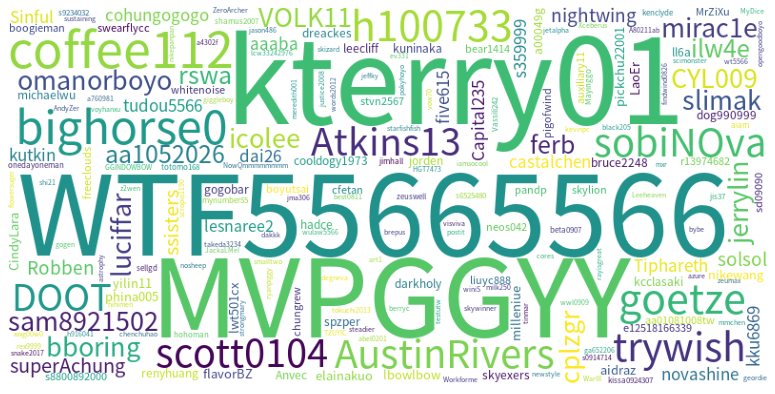

In [128]:
wc_dict = dict(zip(poster_review_count['cmtPoster'],poster_review_count['size'])) #Âª∫Á´ãÊàêdictionary
font = './SourceHanSansTW-Regular.otf' #‰∏≠ÊñáÂ≠óÂûãË∑ØÂæë
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(wc_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #Êää‰ΩúÂúñÁöÑÂ∫ßÊ®ôËª∏ÈóúÊéâ 
plt.show()

‰ª•‰∏äÂàóÂá∫ÁöÑidÁÇ∫È†ªÁπÅÂõûÊñáËÄÖ

Ê≠£Ë≤†Èù¢Á∂≤Ëªç

In [ ]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# Âπ´ÊØèÂè•Ë©±Âä†‰∏äÊÉÖÁ∑íÂàÜÊï∏
Reviews_poster['sentimentvalue'] = Reviews_poster.apply(lambda row : get_sentiment(str(row['cmtContent']),), axis = 1)

In [ ]:
boxplot = Reviews_poster.boxplot(column=['sentimentvalue'], showfliers=False)
boxplot

Â∞áÊØèÂÄã‰∫∫Âú®ÊØèÁØáÊñáÁ´†ÁöÑÁïôË®ÄÁî®snowNLPÂèñÊÉÖÁ∑íÂàÜÊï∏‰∏¶‰∏îÂÅöÂπ≥ÂùáÔºåÂ§ßÊñº0.7Âç≥Ë¶ñÁÇ∫Ë©≤‰∫∫Âú®Ë©≤ÁØáÊñáÁ´†ÁÇ∫Ê≠£Èù¢ÊÉÖÁ∑íÔºåÂ∞èÊñº0.3Âç≥Ë¶ñÁÇ∫Ë©≤‰∫∫Âú®Ë©≤ÁØáÊñáÁ´†ÁÇ∫Ë≤†Èù¢ÊÉÖÁ∑í„ÄÇ

ÁÑ∂ÂæåÁµ±Ë®àÊØèÂÄã‰∫∫ÁöÑÊ≠£Èù¢ÊñáÁ´†Êï∏ÂèäË≤†Èù¢ÊñáÁ´†Êï∏ÂèñÂ∑ÆÂÄºÔºåÈö®ÂæåÂ∞áÊ≠§Â∑ÆÂÄºÂà©Áî®‰∏âÂÄçÊ®ôÊ∫ñÂ∑ÆÊ≥ïÂèñÂá∫outlierÔºåÂç≥ÂæóÂà∞Ë≤†Èù¢Á∂≤ËªçÂèäÊ≠£Èù¢Á∂≤Ëªç„ÄÇ

In [ ]:
sentiment_poster = Reviews_poster.groupby(['artUrl','cmtPoster'])['sentimentvalue'].mean().reset_index()
sentiment=[]
for i in sentiment_poster.sentimentvalue:
    if i > 0.7 :
        sentiment.append('positive')
    elif i < 0.3 :
        sentiment.append('negative')
    else :
        sentiment.append('neutral')
sentiment_poster=pd.concat([sentiment_poster.iloc[:,0:2],pd.DataFrame({'sentiment':sentiment})],axis=1)
sentiment_poster_df=sentiment_poster.groupby(['cmtPoster','sentiment']).count().reset_index()
sentiment_poster_df=sentiment_poster_df.pivot_table(index='cmtPoster', columns='sentiment', values='artUrl', fill_value=0).reset_index()
sentiment_poster_df['cal']=sentiment_poster_df['positive']-sentiment_poster_df['negative']
sentiment_poster_df=sentiment_poster_df.drop(['negative','neutral','positive'],axis=1)

In [ ]:
outlier_ll = sentiment_poster_df.cal.mean() - 3* sentiment_poster_df.cal.std() 
outlier_ul = sentiment_poster_df.cal.mean() + 3* sentiment_poster_df.cal.std()
outlier=sentiment_poster_df.loc[(sentiment_poster_df['cal']> outlier_ul)|(sentiment_poster_df['cal']< outlier_ll),:].reset_index()
outlier_neg=outlier.loc[outlier['cal']<0,:]
outlier_pos=outlier.loc[outlier['cal']>0,:]


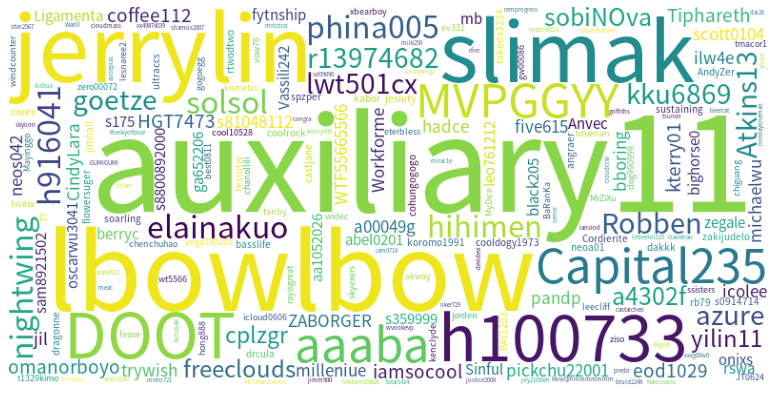

In [130]:
wc_dict = dict(zip(outlier_neg['cmtPoster'], outlier_neg['cal']*-1)) #Âª∫Á´ãÊàêdictionary
font = './SourceHanSansTW-Regular.otf' #‰∏≠ÊñáÂ≠óÂûãË∑ØÂæë
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(wc_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #Êää‰ΩúÂúñÁöÑÂ∫ßÊ®ôËª∏ÈóúÊéâ 
plt.show()

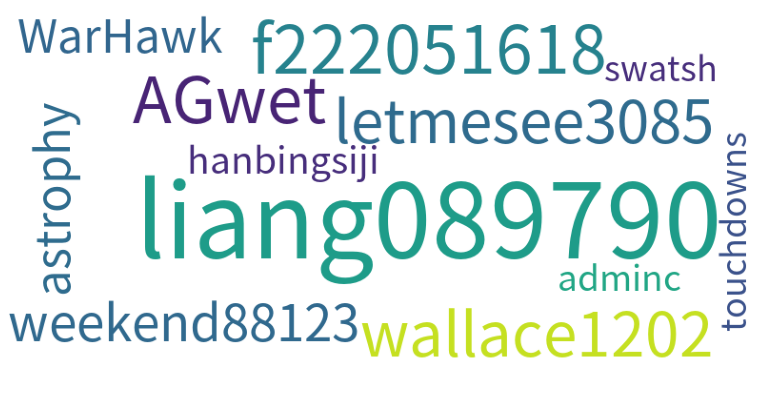

In [131]:
wc_dict = dict(zip(outlier_pos['cmtPoster'], outlier_pos['cal'])) #Âª∫Á´ãÊàêdictionary
font = './SourceHanSansTW-Regular.otf' #‰∏≠ÊñáÂ≠óÂûãË∑ØÂæë
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(wc_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #Êää‰ΩúÂúñÁöÑÂ∫ßÊ®ôËª∏ÈóúÊéâ 
plt.show()

ÂèØ‰ª•ÁôºÁèæÂà∞Ë™™Ê≠£Èù¢Á∂≤ËªçËàáË≤†Èù¢Á∂≤ËªçÈÉΩ‰∏çÊòØÂú®È†ªÁπÅÂõûÊñáÊñáÂ≠óÈõ≤ÂÖßÁúãÂà∞ÁöÑid,ÈõñÁÑ∂‰∏çËÉΩÁ¢∫ÂÆöÊòØÂê¶ÁÇ∫ÁúüÊ≠£ÁöÑÁ∂≤ËªçÔºå‰ΩÜËÉΩÁ¢∫ÂÆöÈÄô‰∫õ‰∫∫ÈõñÁÑ∂Ê≤íÊúâÈ†ªÁπÅÂõûÊñáÔºå‰ΩÜÂπæ‰πéÈÉΩÊòØÂõûË≤†Èù¢/Ê≠£Èù¢ÊÉÖÁ∑íÁöÑÊé®Êñá„ÄÇ

### Dcard

In [200]:
bigramfdist = FreqDist()
def bigram_getToken_dict(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]
    bigramfdist.update(ngrams(seg_list, 2))
    seg_list2 = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list2)]
    return seg_list

In [212]:
bowei_bigram_dcard = Dcard_content_data.copy()
bowei_bigram_dcard["word"] = bowei_bigram_dcard.content.apply(bigram_getToken_dict)
bowei_bigram_dcard_token = bowei_bigram_dcard.explode('word')

In [202]:
d = {k:v for k,v in bigramfdist.most_common(30)}
# Create network plot 
G = nx.Graph()

# Âª∫Á´ã nodes ÈñìÁöÑÈÄ£Áµê
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v)
    
# ÂèñÂæóedgeÊ¨äÈáç
weights = [w[2]['weight']*0.03 for w in  G.edges(data=True)]

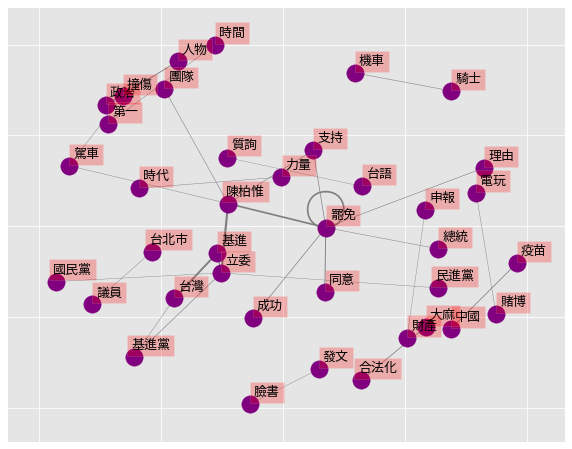

In [203]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Â¢ûÂä† labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### Ê†πÊìöË≠∞È°å‰ΩøÁî®liwcÊÉÖÁ∑íÂàÜÊûê

### case 1  ËÇá‰∫ãÈÄÉÈÄ∏

In [404]:
keywords1 = ['ËÇá‰∫ã','ÈÄÉÈÄ∏','ËÇáÈÄÉ','ËÇá‰∫ãÈÄÉÈÄ∏']
toMatch = '|'.join(keywords1)
Content_issue1=Dcard_content_token.loc[Dcard_content_token['title'].str.contains(toMatch),:]
mask = Dcard_reply_token['id'].isin(Content_issue1['id'].values)
reply_issue1=Dcard_reply_token[mask]
data_issue1 = pd.concat([Content_issue1.loc[:,["id","date","word"]],reply_issue1.loc[:,["id","date","word"]]],axis=0)

id      date word
44  237290497.0  20211023   ËÖ¶Â≠ê
44  237290497.0  20211023  Âè∞‰∏≠‰∫∫
44  237290497.0  20211023   ÁµÇÊñº
44  237290497.0  20211023   Ë∂ïËµ∞
44  237290497.0  20211023   Ê∞ë‰∏ª

In [405]:
#ÊñáÁ´†ÂíåËàáLIWCÊÉÖÁ∑íÂ≠óÂÖ∏ÂÅöÂêà‰Ωµ
data_liwc = pd.merge(data_issue1, df_liwc, on=['word'],how='left')

#ÁÆóÂá∫ÊØèÂ§©ÊÉÖÁ∑íÁ∏ΩÂíå(sentiment_count)
sentiment_count = data_liwc.groupby(['date','sentiments'],as_index=False).size()
sentiment_count['date'] = pd.to_datetime(sentiment_count['date'],format='%Y%m%d')

date sentiments  size
0 2021-10-06   negative   175
1 2021-10-06   positive   100
2 2021-10-07   negative    13
3 2021-10-07   positive     8
4 2021-10-08   negative     2
5 2021-10-18   negative     6
6 2021-10-18   positive     1
7 2021-10-23   negative     1
8 2021-10-23   positive     1

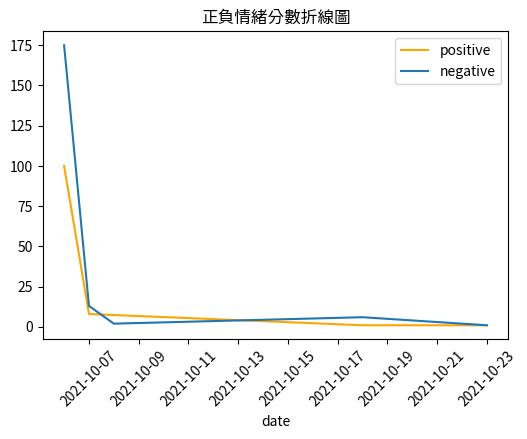

In [406]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # È°ØÁ§∫ÂúñÊ°ÜÊû∂Â§ßÂ∞è (ÂØ¨,È´ò)
plt.style.use("default")     # ‰ΩøÁî®ggplot‰∏ªÈ°åÊ®£Âºè
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #‰Ωø‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus']=False #Áî®‰æÜÊ≠£Â∏∏È°ØÁ§∫Ë≤†Ëôü
plt.title('Ê≠£Ë≤†ÊÉÖÁ∑íÂàÜÊï∏ÊäòÁ∑öÂúñ')
plt.plot(p['date'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['date'].tolist(), n['size'], label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #È°ØÁ§∫Âúñ‰æã
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('date')
plt.show()

10Êúà06Êó•Ë≥áÊ∑±Â™íÈ´î‰∫∫ÁàÜÊñôÈô≥ÊüèÊÉüÈÅéÂæÄÊõæËÇá‰∫ãÈÄÉÈÄ∏ÔºåÊ≠§Ê∂àÊÅØ‰∏ÄÂá∫Á´ãÂç≥ÂºïËµ∑Â§ßÂÆ∂Ë®éË´ñÔºåÂú®DcardÁâà‰∏äÊõ¥ÊòØÂá∫ÁèæÂ§ßÈáèÁöÑË≤†Èù¢ÊÉÖÁ∑íÔºå‰∏çÈÅéÈÄôÊ≥¢ÁÜ±Â∫¶Ê≤íÊúâÂª∂Á∫åÔºåÂæÄÂæåÊñáÁ´†Ê≤íÊúâÂá∫ÁèæÊòéÈ°ØÊÉÖÁ∑í


### Case 2 Ë≥≠Âçö-ÈõªÁé©Âø´ÊâìÊóãÈ¢®

In [219]:
keywords2 = ['Ë≥≠Âçö','ÈõªÁé©','ÈõªÂãï','Âø´ÊâìÊóãÈ¢®']
toMatch = '|'.join(keywords2)
Content_issue2=Dcard_content_token.loc[Dcard_content_token['title'].str.contains(toMatch),:]
mask = Dcard_reply_token['id'].isin(Content_issue2['id'].values)
reply_issue2=Dcard_reply_token[mask]
data_issue2 = pd.concat([Content_issue2.loc[:,["id","date","word"]],reply_issue2.loc[:,["id","date","word"]]],axis=0)

id      date word
187  237176652.0  20211008  Â°îÁ∂†Áè≠
187  237176652.0  20211008   ÂãáÊñº
187  237176652.0  20211008   ÊâøÊìî
191  237176002.0  20211007   Âü∫ÈÄ≤
191  237176002.0  20211007   Á´ãÂßî

In [412]:
#ÊñáÁ´†ÂíåËàáLIWCÊÉÖÁ∑íÂ≠óÂÖ∏ÂÅöÂêà‰Ωµ
data_liwc = pd.merge(data_issue2, df_liwc, on=['word'],how='left')

#ÁÆóÂá∫ÊØèÂ§©ÊÉÖÁ∑íÁ∏ΩÂíå(sentiment_count)
sentiment_count = data_liwc.groupby(['date','sentiments'],as_index=False).size()
sentiment_count['date'] = pd.to_datetime(sentiment_count['date'],format='%Y%m%d')

date sentiments  size
0 2021-10-07   negative    13
1 2021-10-07   positive    14
2 2021-10-08   negative    13
3 2021-10-08   positive     6

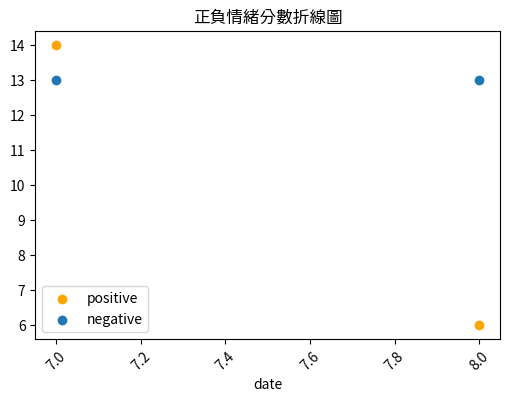

In [428]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # È°ØÁ§∫ÂúñÊ°ÜÊû∂Â§ßÂ∞è (ÂØ¨,È´ò)
plt.style.use("default")     # ‰ΩøÁî®ggplot‰∏ªÈ°åÊ®£Âºè
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #‰Ωø‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus']=False #Áî®‰æÜÊ≠£Â∏∏È°ØÁ§∫Ë≤†Ëôü
plt.title('Ê≠£Ë≤†ÊÉÖÁ∑íÂàÜÊï∏ÊäòÁ∑öÂúñ')
plt.scatter(p['date'].dt.day.tolist(), p['size'].values, label='positive',color="orange")
plt.scatter(n['date'].dt.day.tolist(), n['size'].values, label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #È°ØÁ§∫Âúñ‰æã
plt.xlabel('date')
plt.show()

Èô≥ÊüèÊÉüÊõæÊç≤ÂÖ•Ë≥≠ÂçöÈõªÁé©Ê°àÔºå‰∏çÈÅéÊ≠§‰∫ã‰ª∂Âú®Èô≥ÊüèÊÉüÁ´ãÂç≥Ë∑≥Âá∫ÊæÑÊ∏ÖÂæåÔºåÂç≥Ê≤íÊúâË®éË´ñÁöÑËÅ≤Èáè

### Case3 ÊÉ°ÊÑèÁΩ∑ÂÖç


In [222]:
keywords3 = ['ÊÉ°ÊÑèÁΩ∑ÂÖç','Â†±Âæ©','Â†±Âæ©ÊÄß']
toMatch = '|'.join(keywords3)
Content_issue3=Dcard_content_token.loc[Dcard_content_token['title'].str.contains(toMatch),:]
mask = Dcard_reply_token['id'].isin(Content_issue3['id'].values)
reply_issue3=Dcard_reply_token[mask]
data_issue3 = pd.concat([Content_issue3.loc[:,["id","date","word"]],reply_issue3.loc[:,["id","date","word"]]],axis=0)

id      date word
36  237291358.0  20211023   ÁΩ∑ÂÖç
36  237291358.0  20211023   Â†±Âæ©
36  237291358.0  20211023   ÂæóÁàõ
36  237291358.0  20211023   Âò¥Â∑¥
36  237291358.0  20211023  ÊÑõÂè∞ÁÅ£

In [223]:
#ÊñáÁ´†ÂíåËàáLIWCÊÉÖÁ∑íÂ≠óÂÖ∏ÂÅöÂêà‰Ωµ
data_liwc = pd.merge(data_issue3, df_liwc, on=['word'],how='left')

#ÁÆóÂá∫ÊØèÂ§©ÊÉÖÁ∑íÁ∏ΩÂíå(sentiment_count)
sentiment_count = data_liwc.groupby(['date','sentiments'],as_index=False).size()
sentiment_count['date'] = pd.to_datetime(sentiment_count['date'],format='%Y%m%d')

date sentiments  size
0 2021-10-13   negative    10
1 2021-10-13   positive     6
2 2021-10-14   negative     2
3 2021-10-14   positive     4
4 2021-10-23   negative     9
5 2021-10-23   positive     1
6 2021-10-25   positive     3

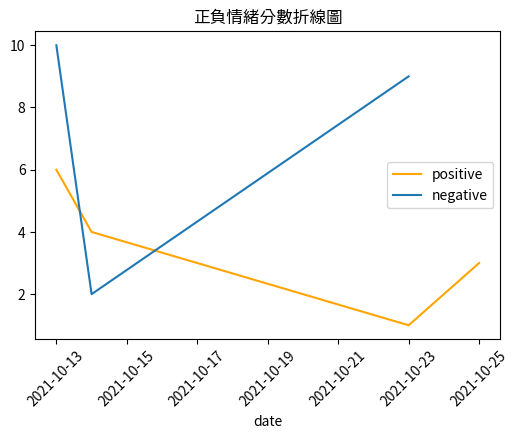

In [224]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # È°ØÁ§∫ÂúñÊ°ÜÊû∂Â§ßÂ∞è (ÂØ¨,È´ò)
plt.style.use("default")     # ‰ΩøÁî®ggplot‰∏ªÈ°åÊ®£Âºè
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #‰Ωø‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus']=False #Áî®‰æÜÊ≠£Â∏∏È°ØÁ§∫Ë≤†Ëôü
plt.title('Ê≠£Ë≤†ÊÉÖÁ∑íÂàÜÊï∏ÊäòÁ∑öÂúñ')
plt.plot(p['date'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['date'].tolist(), n['size'], label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #È°ØÁ§∫Âúñ‰æã
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('date')
plt.show()

ÁΩ∑ÂÖçÈô≥ÊüèÊÉü‰∏ÄÊ°àÊúâË®±Â§ö‰∫∫Ë™çÁÇ∫ÊòØÂ†±Âæ©ÊÄßÁΩ∑ÂÖçÔºåÁî±‰∏äÂúñÂèØ‰ª•ÁúãÂá∫ÔºåÁΩ∑ÂÖçÂâçÂÖ©Âë®‰πüÈñãÂßãÊúâ‰∫∫Âú®Ë®éË´ñÊ≠§Ë≠∞È°åÔºå‰∏îÂ§öÁÇ∫Ë≤†Èù¢ÊÉÖÁ∑í

### Case4 Ë≤°Áî¢Áî≥Â†±

In [225]:
keywords4 = ['Ë≤°Áî¢','Áî≥Â†±','‰∏çÂØ¶']
toMatch = '|'.join(keywords4)
Content_issue4=Dcard_content_token.loc[Dcard_content_token['title'].str.contains(toMatch),:]
mask = Dcard_reply_token['id'].isin(Content_issue4['id'].values)
reply_issue4=Dcard_reply_token[mask]
data_issue4 = pd.concat([Content_issue4.loc[:,["id","date","word"]],reply_issue4.loc[:,["id","date","word"]]],axis=0)

id      date word
97  237275873.0  20211021  ÈÄ£ÂãùÊñá
97  237275873.0  20211021   È°èÂÆ∂
97  237275873.0  20211021   Èóú‰øÇ
97  237275873.0  20211021   Ë™™Ë¨ä
97  237275873.0  20211021   Êù±ÊâØ

In [226]:
#ÊñáÁ´†ÂíåËàáLIWCÊÉÖÁ∑íÂ≠óÂÖ∏ÂÅöÂêà‰Ωµ
data_liwc = pd.merge(data_issue4, df_liwc, on=['word'],how='left')

#ÁÆóÂá∫ÊØèÂ§©ÊÉÖÁ∑íÁ∏ΩÂíå(sentiment_count)
sentiment_count = data_liwc.groupby(['date','sentiments'],as_index=False).size()
sentiment_count['date'] = pd.to_datetime(sentiment_count['date'],format='%Y%m%d')

date sentiments  size
0  2021-09-26   negative    25
1  2021-09-26   positive    10
2  2021-09-27   negative     3
3  2021-09-27   positive     3
4  2021-10-08   negative     2
5  2021-10-08   positive     6
6  2021-10-09   negative     2
7  2021-10-14   negative     8
8  2021-10-14   positive     4
9  2021-10-15   negative     3
10 2021-10-15   positive     3
11 2021-10-21   negative     2
12 2021-10-21   positive     1

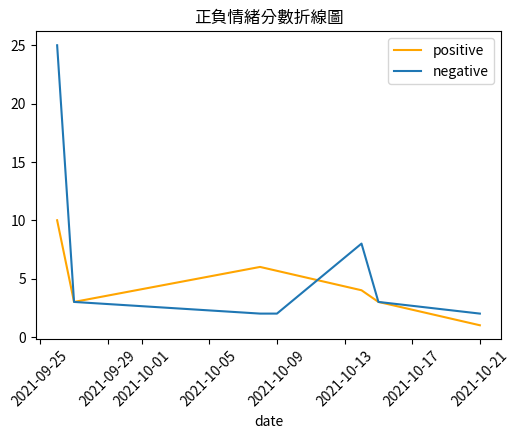

In [227]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # È°ØÁ§∫ÂúñÊ°ÜÊû∂Â§ßÂ∞è (ÂØ¨,È´ò)
plt.style.use("default")     # ‰ΩøÁî®ggplot‰∏ªÈ°åÊ®£Âºè
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #‰Ωø‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus']=False #Áî®‰æÜÊ≠£Â∏∏È°ØÁ§∫Ë≤†Ëôü
plt.title('Ê≠£Ë≤†ÊÉÖÁ∑íÂàÜÊï∏ÊäòÁ∑öÂúñ')
plt.plot(p['date'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['date'].tolist(), n['size'], label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #È°ØÁ§∫Âúñ‰æã
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('date')
plt.show()

Èô≥ÊüèÊÉüÈÅ≠Ë≥™ÁñëË≤°ÂãôÁî≥Â†±‰∏çÂØ¶‰∏Ä‰∫ãÔºåÂú®DcardÂèóÂà∞ÁâπÂà•ÁöÑË®éË´ñÔºå‰∏çÈÅéÊ≤íÊúâÊòéÈ°ØÁöÑÊÉÖÁ∑íÊñπÂêëÔºåÊ≠£Ë≤†ÊÉÖÁ∑í‰∏çÊñ∑‰∫§ÈåØ

### Case5 Â§ßÈ∫ªÂêàÊ≥ïÂåñ

In [228]:
keywords5 = ['Â§ßÈ∫ª','ÂêàÊ≥ï','ÂêàÊ≥ïÂåñ']
toMatch = '|'.join(keywords5)
Content_issue5=Dcard_content_token.loc[Dcard_content_token['title'].str.contains(toMatch),:]
mask = Dcard_reply_token['id'].isin(Content_issue5['id'].values)
reply_issue5=Dcard_reply_token[mask]
data_issue5 = pd.concat([Content_issue5.loc[:,["id","date","word"]],reply_issue5.loc[:,["id","date","word"]]],axis=0)

id      date word
169  237192124.0  20211010   Âü∫ÈÄ≤
169  237192124.0  20211010   Á´ãÂßî
169  237192124.0  20211010  Èô≥ÊüèÊÉü
169  237192124.0  20211010   Èô∑ÂÖ•
169  237192124.0  20211010   ËÇáÈÄÉ

In [229]:
#ÊñáÁ´†ÂíåËàáLIWCÊÉÖÁ∑íÂ≠óÂÖ∏ÂÅöÂêà‰Ωµ
data_liwc = pd.merge(data_issue5, df_liwc, on=['word'],how='left')

#ÁÆóÂá∫ÊØèÂ§©ÊÉÖÁ∑íÁ∏ΩÂíå(sentiment_count)
sentiment_count = data_liwc.groupby(['date','sentiments'],as_index=False).size()
sentiment_count['date'] = pd.to_datetime(sentiment_count['date'],format='%Y%m%d')

date sentiments  size
0 2021-10-04   negative     9
1 2021-10-04   positive    16
2 2021-10-10   negative    27
3 2021-10-10   positive    22
4 2021-10-18   negative     3
5 2021-10-18   positive     3

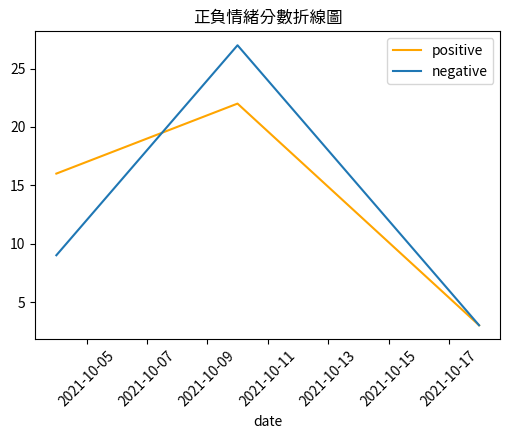

In [230]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # È°ØÁ§∫ÂúñÊ°ÜÊû∂Â§ßÂ∞è (ÂØ¨,È´ò)
plt.style.use("default")     # ‰ΩøÁî®ggplot‰∏ªÈ°åÊ®£Âºè
plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta'] #‰Ωø‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['axes.unicode_minus']=False #Áî®‰æÜÊ≠£Â∏∏È°ØÁ§∫Ë≤†Ëôü
plt.title('Ê≠£Ë≤†ÊÉÖÁ∑íÂàÜÊï∏ÊäòÁ∑öÂúñ')
plt.plot(p['date'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['date'].tolist(), n['size'], label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #È°ØÁ§∫Âúñ‰æã
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('date')
plt.show()

In [ ]:
Èô≥ÊüèÊÉüÊîØÊåÅÂ§ßÈ∫ªÂêàÊ≥ïÂåñ‰∏Ä‰∫ãÔºå‰πüË¢´ÊãøÂá∫‰æÜË®éË´ñÔºåÁî±‰∏äÂúñÂèØ‰ª•ÁúãÂá∫Ë≤†Èù¢ÊÉÖÁ∑íËºÉÂ§ö

## ÊÄßÂà•

In [232]:
gender_content_count = Dcard_content_data.groupby(["gender"],as_index = False).size()
gender_content_count.sort_values(by=['size'], ascending=False,inplace=True)
gender_content_count.head(10)

gender  size
1      M   360
0      F    25

In [233]:
gender_reply_count = Dcard_reply_data.groupby(["gender"],as_index = False).size()
gender_reply_count.sort_values(by=['size'], ascending=False,inplace=True)
gender_reply_count.head(10)

gender  size
2      M  5779
1      F   638
0      D    11

## Â≠∏Ê†°

Áµ±Ë®àÁôºÊñáËÄÖÂ≠∏Ê†°ÂàÜÈÖç

In [348]:
school_content_count = Dcard_content_data.groupby(["school"],as_index = False).size()
school_content_count.sort_values(by=['size'], ascending=False,inplace=True)
school_content_count.head(10)

school  size
95        Ëá∫ÂåóÈÜ´Â≠∏Â§ßÂ≠∏    30
3    Endless Joy    27
90          Ê∑°Ê±üÂ§ßÂ≠∏    23
103         Èï∑Ê¶ÆÂ§ßÂ≠∏    20
35        ÂúãÁ´ã‰∫§ÈÄöÂ§ßÂ≠∏    16
4          Evans    16
47        ÂúãÁ´ãËá∫ÁÅ£Â§ßÂ≠∏    15
48      ÂúãÁ´ãËá∫ÁÅ£Â∏´ÁØÑÂ§ßÂ≠∏    10
57      ÂúãÁ´ãÈ´òÈõÑÁßëÊäÄÂ§ßÂ≠∏     9
67          Â•∂ÈÖíÂíñÂï°     7

Áµ±Ë®àÁïôË®ÄËÄÖÂ≠∏Ê†°ÂàÜÈÖç

In [349]:
school_reply_count = Dcard_reply_data.groupby(["school"],as_index = False).size()
school_reply_count.sort_values(by=['size'], ascending=False,inplace=True)
school_reply_count.head(10)

school  size
216   ÂúãÁ´ãËá∫ÁÅ£Â§ßÂ≠∏   480
428     Ëºî‰ªÅÂ§ßÂ≠∏   240
102     ‰∏≠ÂéüÂ§ßÂ≠∏   203
19   Diorama   160
189   ÂúãÁ´ã‰∫§ÈÄöÂ§ßÂ≠∏   157
209   ÂúãÁ´ãËá∫ÂåóÂ§ßÂ≠∏   157
331   ÊúùÈôΩÁßëÊäÄÂ§ßÂ≠∏   156
398   Ëá∫ÂåóÈÜ´Â≠∏Â§ßÂ≠∏   149
197   ÂúãÁ´ãÊàêÂäüÂ§ßÂ≠∏   136
354     Ê∑°Ê±üÂ§ßÂ≠∏   124

ÁïôË®ÄÊï∏ÂâçÂçÅÂ§ßÂ≠∏Ê†°ÔºåÂ§öÊï∏‰ΩçÊñºÂåóÈÉ®ÔºåÂèØË¶ãÂåóÈÉ®ÁöÑÂ≠∏ÁîüËºÉÊúÉÊñºÁ∂≤Ë∑Ø‰∏äÁôºË®ÄÔºåÂÖ∂‰∏≠Âèà‰ª•Âè∞ÁÅ£Â§ßÂ≠∏Â±ÖÂÜ†„ÄÇ

ËÄåÂ•áÊÄ™ÁöÑÊòØÔºåÁ¨¨ÂõõÂêçÁÇ∫DioramaÔºåÊ≠§ÂêçÁÇ∫‰ΩøÁî®ËÄÖËá™Ë°åÊõ¥ÊîπÂç°Á®±Ôºå‰∏îÂñÆ‰∏Ä‰∫∫Â∞±ÁôºË°®160ÂâáÁïôË®ÄÔºåÈÄôË°åÁÇ∫ËÆìÊàëÂÄëÊá∑Áñë‰ªñÊòØÁ∂≤ËªçÔºåÂõ†Ê≠§ÊàëÂÄëÂ∞áÊõ¥ÈÄ≤‰∏ÄÊ≠•Â∞çÈÄôÈ°ûÂûãÁöÑÂ∏≥ËôüÈÄ≤Ë°åË®éË´ñ

### ÊâæÂá∫Á∂≤Ëªç(ÊîøÊ≤ªÁ´ãÂ†¥ÈÆÆÊòéËÄÖ)ÁöÑÂ≠òÂú®

In [431]:
#Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./dict/dict.txt.big')
#Êñ∞Â¢ûËá™ÂÆöÁæ©Â≠óÂÖ∏
jieba.load_userdict('./dict/cyber_army/user_dict.txt')
with open('./dict/cyber_army/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]
w=['È´òÈõÑ','‰∏çÁî®','Áï∂Âàù','ÂòªÂòª','ÂèçÊ≠£','‰∏ÄÂ†Ü','Âè™ËÉΩ','ÊòéÊòé','ÊúâÊ≤íÊúâ','Âè™ÊúÉ','Êï¥Â§©','‰∏ÄÈªû','ÂππÂòõ','ÈÄôÊòØ','Êúâ‰∫∫','Âú∞Êñπ','ÈÇÑÂú®','Âè∞‰∏≠','ÊäïÁ•®','ÈÅ∏Ê∞ë']
for i in w:
    stopWords.append(i)

Building prefix dict from C:\Users\Roger\Desktop\Á†îÁ©∂ÊâÄ\Á¢©‰∫å‰∏ä\Á§æÁæ§Â™íÈ´îÂàÜÊûê\Êúü‰∏≠Â∞àÊ°à\dict\dict.txt.big ...
Loading model from cache C:\Users\Roger\AppData\Local\Temp\jieba.ub71048b8c07f5daab26a6e4a18fdb850.cache
Loading model cost 2.475 seconds.
Prefix dict has been built successfully.


In [430]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"./dict/cyber_army/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])
df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)

word sentiments
0     ‰∏ÄÁÑ°ÊâÄÊúâ   negative
1     ‰∏ÉÁ´ÖÁîüÁÖô   negative
2       ‰∏äÁï∂   negative
3       ‰∏ãÊµÅ   negative
4       ‰∏ãÁ≠â   negative
...    ...        ...
1772    È≠ÖÂäõ   positive
1773    ÈÆÆÊòé   positive
1774    ÈÆÆÁæé   positive
1775    ÈºìÂãµ   positive
1776    ÈºìËàû   positive

[1777 rows x 2 columns]

In [432]:
mask1 = ~school_reply_count.school.str.contains('Â§ßÂ≠∏')
mask2 = ~school_reply_count.school.str.contains('Â≠∏Ê†°')
mask3 = school_reply_count['size'] > 15
mask = mask1 & mask2 & mask3

In [433]:
special_people = school_reply_count[mask]['school'].values
special = {'id':special_people,'negative':[],'positive':[],'total_like':[],'reply_count':[]}
anti_bowei = []
pro_bowei = []
Dcard_reply_data['word'] = Dcard_reply_data.content.apply(getToken)
for i in special_people:
    mask = Dcard_reply_data['school'] == i
    Dcard_reply_data[mask].explode('word')['word']
    n_count = sum(Dcard_reply_data[mask].explode('word').merge(df_liwc,on='word',how = 'left')['sentiments'] == 'negative')
    p_count = sum(Dcard_reply_data[mask].explode('word').merge(df_liwc,on='word',how = 'left')['sentiments'] == 'positive')
    special['negative'].append(n_count)
    special['positive'].append(p_count)
    try :
        if n_count/p_count >= 1 :
            anti_bowei.append(i)
        else :
            pro_bowei.append(i)
    except ZeroDivisionError :
        anti_bowei.append(i)

In [434]:
for ident in special['id'] :
    mask = Dcard_reply_data['school'] == ident
    special['total_like'].append(Dcard_reply_data[mask]['likeCount'].sum())
    special['reply_count'].append(len(Dcard_reply_data[mask]['content']))
special_data = pd.DataFrame(special)
special_data['np_ratio'] = round(special_data['negative']/special_data['positive'],2)
special_data['LikePerReply'] = round(special_data['total_like']/special_data['reply_count'],2)
special_data

id  negative  positive  total_like  reply_count  np_ratio  \
0        Diorama       253       112       460.0          160      2.26   
1      Discogood        69        12       510.0           79      5.75   
2           Á∂†ÁöÑ‰∏ñÁïå        66        14       396.0           52      4.71   
3        ÊàëÂè™ÊòØÂñúÊ≠°Ë®≠Ë®à         8         7       204.0           38      1.14   
4       BeatDark         9        11       105.0           33      0.82   
5       Ë∂äÊúÉÂò¥ÁÇÆÂÆò‰ΩçË∂äÈ´ò         9        11       371.0           32      0.82   
6          Evans        26         8       359.0           32      3.25   
7            ËÆÄÊõ∏‰∫∫        21        20        80.0           31      1.05   
8         Ë∂ôÈõ≤Ë¨ÄÂ£´Ë≥àË©°        19         1       193.0           30     19.00   
9          Ë≤ìË≤ìÈ†≠Á§æÈï∑        25         8       272.0           29      3.12   
10            ÂÖîÂÖî        17         2       262.0           28      8.50   
11         ÊâìÁÅ´ÁÜäÈ∫ªÂêâ         5         3       230.0           28      1.67   
12  hsnushm10425        15         9       324.0           28      1.67   
13        Byredo        20         4       138.0           27      5.00   
14      Puko boz        24        24       163.0           24      1.00   
15            ÂåøÂêç        24         7       169.0           24      3.43   
16           dou         9         5       242.0           21      1.80   
17      ÂîØÊúâÁõ∏ÊÄù‰∏çÂèØÈÜ´üëπ         4         8        83.0           20      0.50   
18      ÂêÉËêäË±¨ÔºåÊïëÂè∞ÁÅ£!         6         0       226.0           20       inf   
19            ÁßÄÂêâ         7         5       249.0           19      1.40   
20      1450Á∂≤ËªçÈ†≠È†≠         4         7       198.0           18      0.57   
21         Â§öÈáëÂ∑¥Ëè≤Âì•         3         1       816.0           17      3.00   
22          ‰∏≠Âπ¥Â§ßÂèî        19        12       178.0           16      1.58   
23          Locc         8         4       124.0           16      2.00   

    LikePerReply  
0           2.88  
1           6.46  
2           7.62  
3           5.37  
4           3.18  
5          11.59  
6          11.22  
7           2.58  
8           6.43  
9           9.38  
10          9.36  
11          8.21  
12         11.57  
13          5.11  
14          6.79  
15          7.04  
16         11.52  
17          4.15  
18         11.30  
19         13.11  
20         11.00  
21         48.00  
22         11.12  
23          7.75

ÈÄô‰∫õ‰ΩøÁî®ËÄÖ‰∏≠ÔºåDioramaÁôºË°®ÊúÄÂ§öÁïôË®ÄÔºåÂÖ∂Ê¥ªË∫çÂ∫¶ÈùûÂ∏∏È´òÔºõÂ§öÈáëÂ∑¥Ëè≤Âì•Áç≤ÂæóÊúÄÂ§öÊÑõÂøÉÊï∏ÔºåÂÖ∂ÁôºË®ÄÂèóÂà∞Ë®±Â§ö‰∫∫ÂñúÊÑõÔºõÂÖîÂÖîÁïôË®ÄÁöÑË≤†Èù¢ÊÉÖÁ∑íÊØî‰æãÊúÄÈ´òÔºåÂèØ‰ª•ËßÄÂØüÂÖ∂ÊòØÂê¶ÁÇ∫‰ªª‰Ωï‰∫ãÈÉΩÊâπË©ïÁöÑÁ∂≤Ëªç

### ËßÄÂØüÂêÑÂ≠∏Ê†°ÁôºË®Ä‰πãÊÉÖÁ∑í

In [439]:
mask1 = school_reply_count.school.str.contains('Â§ßÂ≠∏')
mask2 = school_reply_count.school.str.contains('Â≠∏Ê†°')
mask3 = school_reply_count['size'] > 1
mask = (mask1 | mask2) & mask3

In [440]:
school = school_reply_count[mask]['school'].values
school_data = {'school':school,'negative':[],'positive':[],'total_like':[],'highest_like':[],'reply_count':[]}
anti_bowei = []
pro_bowei = []
Dcard_reply_data['word'] = Dcard_reply_data.content.apply(getToken)
for i in school:
    mask = Dcard_reply_data['school'] == i
    n_count = sum(Dcard_reply_data[mask].explode('word').merge(df_liwc,on='word',how = 'left')['sentiments'] == 'negative')
    p_count = sum(Dcard_reply_data[mask].explode('word').merge(df_liwc,on='word',how = 'left')['sentiments'] == 'positive')
    school_data['negative'].append(n_count)
    school_data['positive'].append(p_count)
    try :
        if n_count/p_count >= 1 :
            anti_bowei.append(i)
        else :
            pro_bowei.append(i)
    except ZeroDivisionError :
        anti_bowei.append(i)

In [441]:
for ident in school_data['school'] :
    mask = Dcard_reply_data['school'] == ident
    school_data['total_like'].append(Dcard_reply_data[mask]['likeCount'].sum())
    school_data['reply_count'].append(len(Dcard_reply_data[mask]['content']))
    school_data['highest_like'].append(Dcard_reply_data[mask]['likeCount'].max())
school_data = pd.DataFrame(school_data)
school_data['np_ratio'] = round(school_data['negative']/school_data['positive'],2)
school_data['LikePerReply'] = round(school_data['total_like']/school_data['reply_count'],2)
school_data.head(10)

school  negative  positive  total_like  highest_like  reply_count  \
0  ÂúãÁ´ãËá∫ÁÅ£Â§ßÂ≠∏       188        99      8443.0        1132.0          480   
1    Ëºî‰ªÅÂ§ßÂ≠∏       122        50      2575.0         124.0          240   
2    ‰∏≠ÂéüÂ§ßÂ≠∏       115        51      2882.0         151.0          203   
3  ÂúãÁ´ã‰∫§ÈÄöÂ§ßÂ≠∏        77        33      4649.0        3089.0          157   
4  ÂúãÁ´ãËá∫ÂåóÂ§ßÂ≠∏        65        36      1321.0         180.0          157   
5  ÊúùÈôΩÁßëÊäÄÂ§ßÂ≠∏        91        58      1488.0         132.0          156   
6  Ëá∫ÂåóÈÜ´Â≠∏Â§ßÂ≠∏        78        69       517.0          55.0          149   
7  ÂúãÁ´ãÊàêÂäüÂ§ßÂ≠∏        76        29      1535.0         285.0          136   
8    Ê∑°Ê±üÂ§ßÂ≠∏        71        36      1683.0         394.0          124   
9  ÂúãÁ´ã‰∏≠Ê≠£Â§ßÂ≠∏        52        32      1443.0         289.0          117   

   np_ratio  LikePerReply  
0      1.90         17.59  
1      2.44         10.73  
2      2.25         14.20  
3      2.33         29.61  
4      1.81          8.41  
5      1.57          9.54  
6      1.13          3.47  
7      2.62         11.29  
8      1.97         13.57  
9      1.62         12.33

In [460]:
mask = np.where(school_data['highest_like'] == max(school_data['highest_like']),True,False)
mask2 = np.where(school_data['np_ratio'] == max(school_data['np_ratio']),True,False)

In [459]:
school_data.dropna(how='all',axis=1,inplace = True)
school_data

school  negative  positive  total_like  highest_like  reply_count  \
0      ÂúãÁ´ãËá∫ÁÅ£Â§ßÂ≠∏       188        99      8443.0        1132.0          480   
1        Ëºî‰ªÅÂ§ßÂ≠∏       122        50      2575.0         124.0          240   
2        ‰∏≠ÂéüÂ§ßÂ≠∏       115        51      2882.0         151.0          203   
3      ÂúãÁ´ã‰∫§ÈÄöÂ§ßÂ≠∏        77        33      4649.0        3089.0          157   
4      ÂúãÁ´ãËá∫ÂåóÂ§ßÂ≠∏        65        36      1321.0         180.0          157   
..        ...       ...       ...         ...           ...          ...   
130    ÂÅ•Ë°åÁßëÊäÄÂ§ßÂ≠∏         0         0         7.0           4.0            2   
131  ÂúãÁ´ãËá∫Êù±Â∞àÁßëÂ≠∏Ê†°         6         2         2.0           1.0            2   
132     Â§èÂ®ÅÂ§∑Â§ßÂ≠∏         0         0        10.0           7.0            2   
133     Â§öÂÄ´Â§öÂ§ßÂ≠∏         1         0        13.0           8.0            2   
134      Â§ßËëâÂ§ßÂ≠∏         1         1        10.0           9.0            2   

     np_ratio  LikePerReply  
0        1.90         17.59  
1        2.44         10.73  
2        2.25         14.20  
3        2.33         29.61  
4        1.81          8.41  
..        ...           ...  
130       NaN          3.50  
131      3.00          1.00  
132       NaN          5.00  
133       NaN          6.50  
134      1.00          5.00  

[135 rows x 8 columns]

In [461]:
print("ÊÑõÂøÉÁ∏ΩÊï∏ÊúÄÈ´ò",school_data[mask][['school','highest_like']])
print("Ë≤†Èù¢ÊØî‰æãÊúÄÈ´ò",school_data[mask2][['school','np_ratio']])

ÊÑõÂøÉÁ∏ΩÊï∏ÊúÄÈ´ò    school  highest_like
3  ÂúãÁ´ã‰∫§ÈÄöÂ§ßÂ≠∏        3089.0
Ë≤†Èù¢ÊØî‰æãÊúÄÈ´ò    school  np_ratio
51   ÂâøËî°Â§ßÂ≠∏      43.0


#### Êñ∞Â¢ûÂèçÊ∞ëÈÄ≤Èª®„ÄÅÂèçÈô≥ÊüèÊÉüÂ≠óÂÖ∏

In [25]:
con_words = []
file = './dict/cyber_army/con_bowei.txt'
with open(file, 'r', encoding='UTF-8-sig') as f:
    con_words = f.read().split("\n")
print(con_words[:15])

['Â°îÁ∂†Êñë', 'Â°îÁ∂†Áè≠', 'Â°îÁ∂†', 'Â°îÁ∂†Áãó', 'ÂÜ•Á¶ÅÈª®', 'ÂÜ•ÈÄ≤Èª®', 'ËèúÈô∞È≠Ç', 'Ëî°Èô∞È≠Ç', 'Á∂†Áãó', 'ÈõûÈõûÈª®', 'Ëî°Áöá', 'Ëî°ÁöáÂ∏ù', 'ËèúÁöáÂ∏ù', 'ËèúÁöá', 'Ëî°Á¶ÅË©ï']


In [32]:
# Âê´Êúâcon words(ÁâπÂÆöÁ´ãÂ†¥ÁöÑÂèçÂ∞çÊñáÂ≠ó)ÁöÑÁïôË®ÄÊØî‰æãÈ´òÈÅî 10 %
count = 0
for i in range(len(con_words)):
    count += sum(Dcard_reply_data['content'].str.contains(con_words[i]))
print('Âê´ÊúâÂèçÊ∞ëÈÄ≤Èª®„ÄÅÈô≥ÊüèÊÉüÂ≠óÂÖ∏‰πãÂ≠óË©ûÁöÑÁïôË®ÄÊØî‰æãÁÇ∫Ôºö',round(count/len(Dcard_reply_data['content']),4)*100,'%')

Âê´ÊúâÂèçÊ∞ëÈÄ≤Èª®„ÄÅÈô≥ÊüèÊÉüÂ≠óÂÖ∏‰πãÂ≠óË©ûÁöÑÁïôË®ÄÊØî‰æãÁÇ∫Ôºö 13.28 %
